__G2M insight for Cab Investment firm

__G2M Case Study

__Project detail:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights.

__Data Set:

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users



In [209]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [210]:
cab_data=pd.read_csv("/Users/jhasija9/Documents/Data Glacier Internship/Week-2/DataSets/Cab_Data.csv")
city_data=pd.read_csv("/Users/jhasija9/Documents/Data Glacier Internship/Week-2/DataSets/City.csv")
customer_id=pd.read_csv("/Users/jhasija9/Documents/Data Glacier Internship/Week-2/DataSets/Customer_ID.csv")
transaction_id=pd.read_csv("/Users/jhasija9/Documents/Data Glacier Internship/Week-2/DataSets/Transaction_ID.csv")

In [211]:
cab_data.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [212]:
city_data.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [213]:
customer_id.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [214]:
transaction_id.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [215]:
#shape of whole dataset
print("Shape of Cab Dataset", cab_data.shape)
print("Shape of Cab Dataset", city_data.shape)
print("Shape of Cab Dataset", customer_id.shape)
print("Shape of Cab Dataset", transaction_id.shape)

Shape of Cab Dataset (359392, 7)
Shape of Cab Dataset (20, 3)
Shape of Cab Dataset (49171, 4)
Shape of Cab Dataset (440098, 3)


In [216]:
cab_data.info()
city_data.info()
customer_id.info()
transaction_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0

In [217]:
#checking for null values
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [218]:
#checking for null values
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [219]:
#checking for null values
customer_id.isnull().sum()


Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [220]:
#checking for null values
transaction_id.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [221]:
for col in cab_data.columns:
    if ' ' in col:
        cab_data.rename(columns={col:col.replace(' ','_')})

In [222]:
for col in city_data.columns:
    if ' ' in col:
        city_data.rename(columns={col:col.replace(' ','_')})

In [223]:
for col in transaction_id.columns:
    if ' ' in col:
        transaction_id.rename(columns={col:col.replace(' ','_')})

In [224]:
for col in customer_id.columns:
    if ' ' in col:
        customer_id.rename(columns={col:col.replace(' ','_')})

In [225]:
#  convert the 'Date' column to datetime format
import datetime
def ordinary_date(x):
    temp = datetime.datetime(1900, 1, 1)
    delta = datetime.timedelta(x)
    return temp+delta
     

cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x:ordinary_date(x))
cab_data.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-10  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-08  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-04  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-09  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-05  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [226]:
# Extract day
cab_data['Day'] = cab_data['Date of Travel'].dt.day

# Extract month
cab_data['Month'] = cab_data['Date of Travel'].dt.month

# Extract year
cab_data['Year'] = cab_data['Date of Travel'].dt.year

In [227]:
cab_data['Profit']=pd.DataFrame(cab_data['Price Charged']-cab_data['Cost of Trip'])
cab_data.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-10  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-08  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-04  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-09  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-05  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Day  Month  Year  Profit  
0         370.95       313.635   10      1  2016  57.315  
1         358.52       334.854    8      1  2016  23.666  
2         125.20        97.632    4      1  2016  27.568  
3         377.40       351.602    9      1  2016  25.798  
4         114.62        97.776    5      1  2016  16.844

In [228]:
cab_data['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

In [272]:
cab_data.rename(columns={'Price Charged': 'Price_Charged'}, inplace=True)
cab_data.rename(columns={'Cost of Trip': 'Cost_of_Trip'}, inplace=True)

cab_data

Transaction_ID Date of Travel     Company           City  \
0             10000011     2016-01-10    Pink Cab     ATLANTA GA   
1             10000012     2016-01-08    Pink Cab     ATLANTA GA   
2             10000013     2016-01-04    Pink Cab     ATLANTA GA   
3             10000014     2016-01-09    Pink Cab     ATLANTA GA   
4             10000015     2016-01-05    Pink Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-10  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-06  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-07  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-07  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-04  Yellow Cab  WASHINGTON DC   

        KM_Travelled  Price_Charged  Cost_of_Trip  Day  Month  Year   Profit  
0              30.45         370.95      313.6350   10      1  2016  57.3150  
1              28.62         358.52      334.8540    8      1  2016  23.6660  
2               9.04         125.20       97.6320    4      1  2016  27.5680  
3              33.17         377.40      351.6020    9      1  2016  25.7980  
4               8.73         114.62       97.7760    5      1  2016  16.8440  
...              ...            ...           ...  ...    ...   ...      ...  
359387          4.80          69.24       63.3600   10      1  2018   5.8800  
359388          8.40         113.75      106.8480    6      1  2018   6.9020  
359389         27.75         437.07      349.6500    7      1  2018  87.4200  
359390          8.80         146.19      114.0480    7      1  2018  32.1420  
359391         12.76         191.58      177.6192    4      1  2018  13.9608  

[359392 rows x 11 columns]

In [273]:
# before doing EDA, let's split the dataset into Pink Cab and Yellow Cab
PinkCab=cab_data[cab_data['Company']=='Pink Cab']
YellowCab=cab_data[cab_data['Company']=='Yellow Cab']
YellowCab

Transaction_ID Date of Travel     Company           City  \
233           10000384     2016-01-04  Yellow Cab     ATLANTA GA   
234           10000385     2016-01-11  Yellow Cab     ATLANTA GA   
235           10000386     2016-01-05  Yellow Cab     ATLANTA GA   
236           10000387     2016-01-08  Yellow Cab     ATLANTA GA   
237           10000388     2016-01-09  Yellow Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-10  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-06  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-07  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-07  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-04  Yellow Cab  WASHINGTON DC   

        KM_Travelled  Price_Charged  Cost_of_Trip  Day  Month  Year    Profit  
233            33.93        1341.17      464.1624    4      1  2016  877.0076  
234            42.18        1412.06      516.2832   11      1  2016  895.7768  
235            10.60         364.62      132.2880    5      1  2016  232.3320  
236            26.75         838.00      333.8400    8      1  2016  504.1600  
237            46.02        1540.61      596.4192    9      1  2016  944.1908  
...              ...            ...           ...  ...    ...   ...       ...  
359387          4.80          69.24       63.3600   10      1  2018    5.8800  
359388          8.40         113.75      106.8480    6      1  2018    6.9020  
359389         27.75         437.07      349.6500    7      1  2018   87.4200  
359390          8.80         146.19      114.0480    7      1  2018   32.1420  
359391         12.76         191.58      177.6192    4      1  2018   13.9608  

[274681 rows x 11 columns]

In [274]:
cab_data.rename(columns={'Transaction ID': 'Transaction_ID'}, inplace=True)
cab_data.rename(columns={'KM Travelled': 'KM_Travelled'}, inplace=True)
PinkCab.rename(columns={'KM Travelled': 'KM_Travelled'}, inplace=True)
YellowCab.rename(columns={'KM Travelled': 'KM_Travelled'}, inplace=True)
YellowCab

/var/folders/_n/q8m30_td1vz_7986hph1s4wh0000gp/T/ipykernel_25790/55161737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PinkCab.rename(columns={'KM Travelled': 'KM_Travelled'}, inplace=True)
/var/folders/_n/q8m30_td1vz_7986hph1s4wh0000gp/T/ipykernel_25790/55161737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  YellowCab.rename(columns={'KM Travelled': 'KM_Travelled'}, inplace=True)


Transaction_ID Date of Travel     Company           City  \
233           10000384     2016-01-04  Yellow Cab     ATLANTA GA   
234           10000385     2016-01-11  Yellow Cab     ATLANTA GA   
235           10000386     2016-01-05  Yellow Cab     ATLANTA GA   
236           10000387     2016-01-08  Yellow Cab     ATLANTA GA   
237           10000388     2016-01-09  Yellow Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-10  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-06  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-07  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-07  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-04  Yellow Cab  WASHINGTON DC   

        KM_Travelled  Price_Charged  Cost_of_Trip  Day  Month  Year    Profit  
233            33.93        1341.17      464.1624    4      1  2016  877.0076  
234            42.18        1412.06      516.2832   11      1  2016  895.7768  
235            10.60         364.62      132.2880    5      1  2016  232.3320  
236            26.75         838.00      333.8400    8      1  2016  504.1600  
237            46.02        1540.61      596.4192    9      1  2016  944.1908  
...              ...            ...           ...  ...    ...   ...       ...  
359387          4.80          69.24       63.3600   10      1  2018    5.8800  
359388          8.40         113.75      106.8480    6      1  2018    6.9020  
359389         27.75         437.07      349.6500    7      1  2018   87.4200  
359390          8.80         146.19      114.0480    7      1  2018   32.1420  
359391         12.76         191.58      177.6192    4      1  2018   13.9608  

[274681 rows x 11 columns]

In [275]:
group_by_month = cab_data[cab_data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
group_by_month

Month
1      5502
2      3347
3      4067
4      4104
5      5058
6      5534
7      6651
8      7768
9      9385
10    10800
11    10911
12    11584
Name: Transaction_ID, dtype: int64

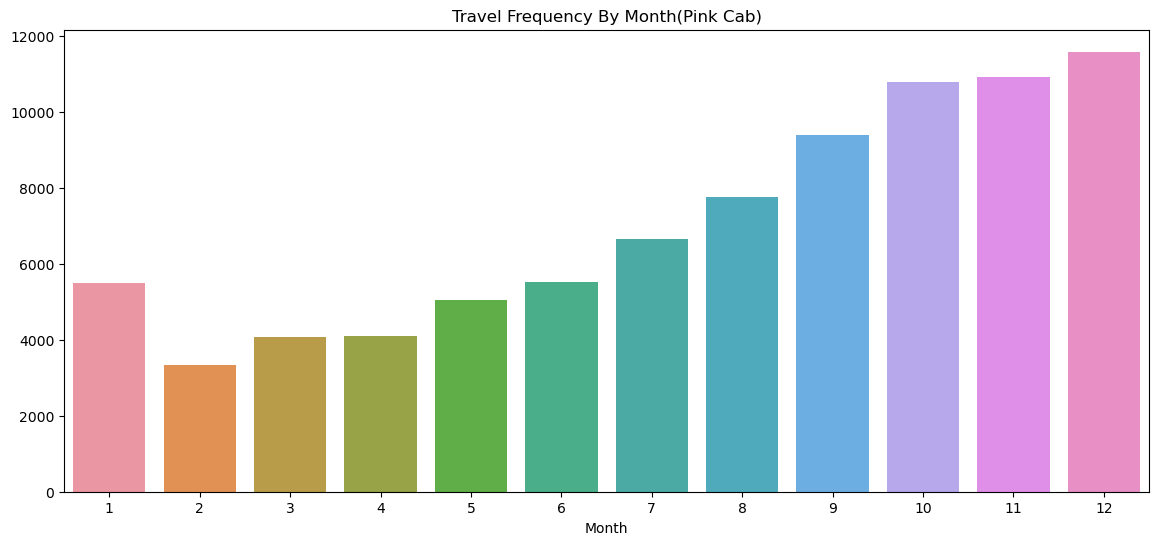

In [276]:
plt.figure(figsize=(14,6))
sns.barplot(x=group_by_month.index,y=group_by_month.values)
plt.title('Travel Frequency By Month(Pink Cab)')
plt.show()

In [277]:
group_by_month_y = cab_data[cab_data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
group_by_month_y

Month
1     19251
2     15045
3     16633
4     17717
5     19247
6     17748
7     21147
8     23921
9     26447
10    30919
11    31454
12    35152
Name: Transaction_ID, dtype: int64

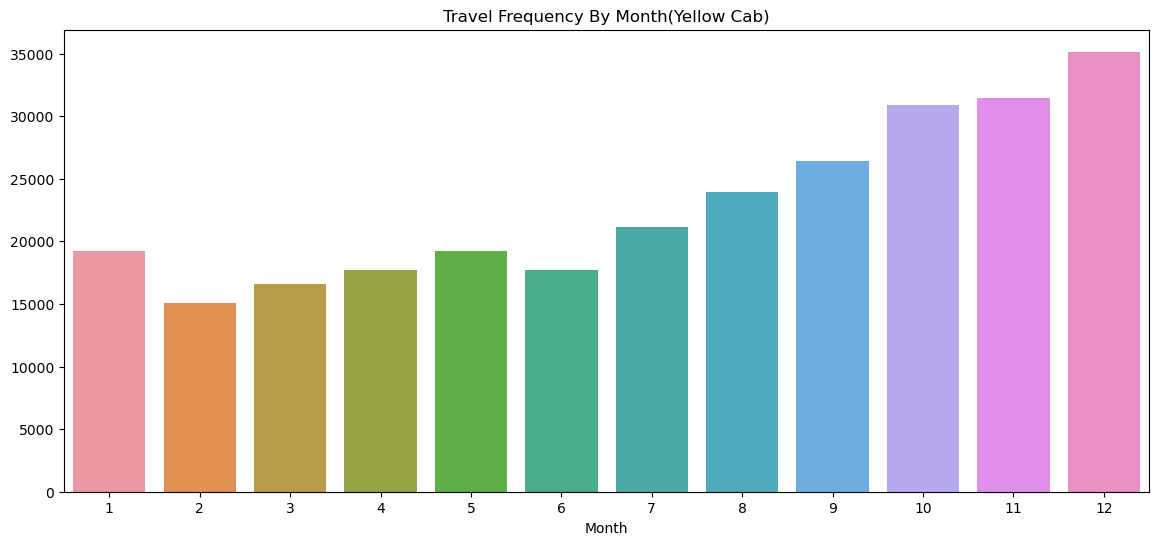

In [278]:
plt.figure(figsize=(14,6))
sns.barplot(x=group_by_month_y.index,y=group_by_month_y.values)
plt.title('Travel Frequency By Month(Yellow Cab)')
plt.show()

In [279]:
## Yellow Cab has higher travels (35000) in the month of December which is the holiday season compared to Pink Cab (11000).

In [280]:
overall_distance=cab_data['KM_Travelled'].describe()
PinkCab_distance=PinkCab['KM_Travelled'].describe()
YellowCab_distance=YellowCab['KM_Travelled'].describe()
# YellowCab_distance
# PinkCab_distance

In [281]:
df = pd.DataFrame({'Overall': overall_distance.values,
                  'PinkCab': PinkCab_distance.values,
                  'YellowCab': YellowCab_distance.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df

Overall       PinkCab      YellowCab
Count      359392.000000  84711.000000  274681.000000
Mean           22.567254     22.559917      22.569517
Std. Dev.      12.233526     12.231092      12.234298
Min             1.900000      1.900000       1.900000
25%            12.000000     12.000000      11.990000
50%            22.440000     22.440000      22.440000
75%            32.960000     32.960000      32.960000
Max            48.000000     48.000000      48.000000

/var/folders/_n/q8m30_td1vz_7986hph1s4wh0000gp/T/ipykernel_25790/2412504786.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_Pink = sns.distplot(PinkCab['KM_Travelled'], kde=False, color='green')


Text(0, 0.5, 'frequency')

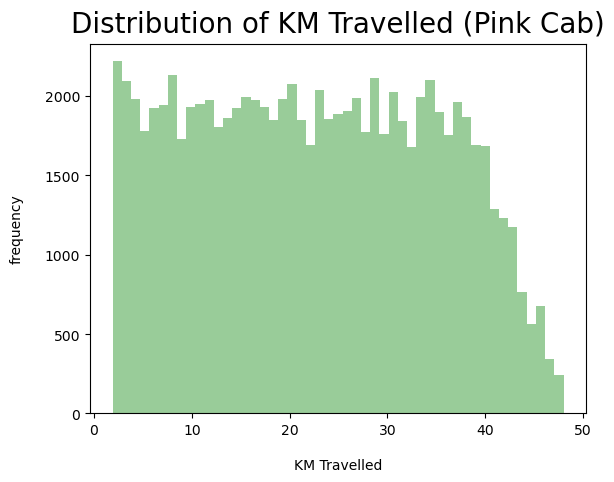

In [282]:
ax_Pink = sns.distplot(PinkCab['KM_Travelled'], kde=False, color='green')
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)


/var/folders/_n/q8m30_td1vz_7986hph1s4wh0000gp/T/ipykernel_25790/2817861575.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax_Yellow = sns.distplot(YellowCab['KM_Travelled'], kde=False, color='green')


Text(0, 0.5, 'frequency')

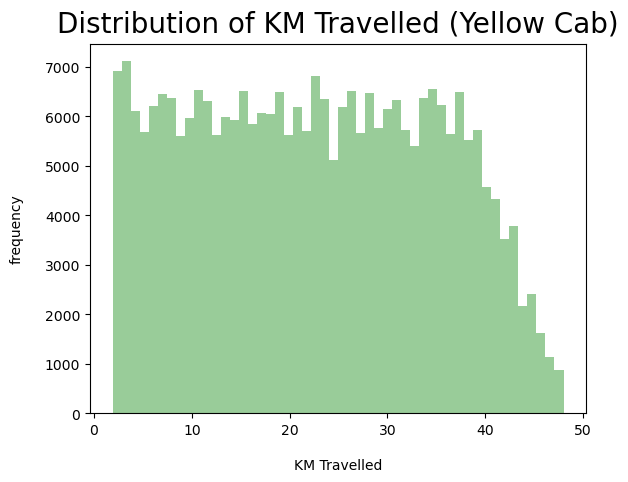

In [283]:
ax_Yellow = sns.distplot(YellowCab['KM_Travelled'], kde=False, color='green')
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)


In [284]:
overall_price=cab_data['Price_Charged'].describe()
PinkCab_price=PinkCab['Price_Charged'].describe()
YellowCab_price=YellowCab['Price_Charged'].describe()

In [285]:
df = pd.DataFrame({'Overall': overall_price.values,
                  'PinkCab': PinkCab_price.values,
                  'YellowCab': YellowCab_price.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df

Overall       PinkCab      YellowCab
Count      359392.000000  84711.000000  274681.000000
Mean          423.443311    310.800856     458.181990
Std. Dev.     274.378911    181.995661     288.386166
Min            15.600000     15.600000      20.730000
25%           206.437500    159.970000     226.680000
50%           386.360000    298.060000     425.060000
75%           583.660000    441.505000     633.880000
Max          2048.030000   1623.480000    2048.030000

In [286]:

YellowCab

Transaction_ID Date of Travel     Company           City  \
233           10000384     2016-01-04  Yellow Cab     ATLANTA GA   
234           10000385     2016-01-11  Yellow Cab     ATLANTA GA   
235           10000386     2016-01-05  Yellow Cab     ATLANTA GA   
236           10000387     2016-01-08  Yellow Cab     ATLANTA GA   
237           10000388     2016-01-09  Yellow Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10440101     2018-01-10  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-06  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-07  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-07  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-04  Yellow Cab  WASHINGTON DC   

        KM_Travelled  Price_Charged  Cost_of_Trip  Day  Month  Year    Profit  
233            33.93        1341.17      464.1624    4      1  2016  877.0076  
234            42.18        1412.06      516.2832   11      1  2016  895.7768  
235            10.60         364.62      132.2880    5      1  2016  232.3320  
236            26.75         838.00      333.8400    8      1  2016  504.1600  
237            46.02        1540.61      596.4192    9      1  2016  944.1908  
...              ...            ...           ...  ...    ...   ...       ...  
359387          4.80          69.24       63.3600   10      1  2018    5.8800  
359388          8.40         113.75      106.8480    6      1  2018    6.9020  
359389         27.75         437.07      349.6500    7      1  2018   87.4200  
359390          8.80         146.19      114.0480    7      1  2018   32.1420  
359391         12.76         191.58      177.6192    4      1  2018   13.9608  

[274681 rows x 11 columns]

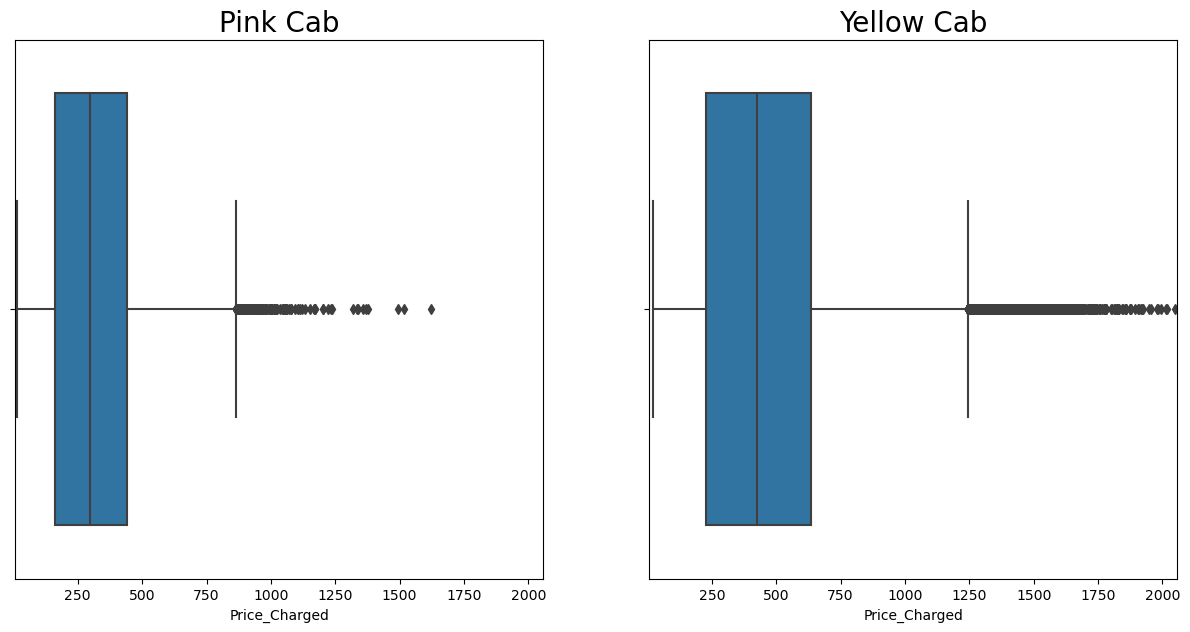

In [287]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15, 7))

# Plot for Pink Cab
sns.boxplot(data=PinkCab, x='Price_Charged', ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
ax1.set_xlim(min(PinkCab['Price_Charged'].min(), YellowCab['Price_Charged'].min()) - 10, 
             max(PinkCab['Price_Charged'].max(), YellowCab['Price_Charged'].max()) + 10)

# Plot for Yellow Cab
sns.boxplot(data=YellowCab, x='Price_Charged', ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)

# Show the plot
plt.show()

In [288]:
#Outliers
#These outliers are due to use of high-end cars so decided to keep it.
#The price charge range for Yellow cab is more than the Pink cab.

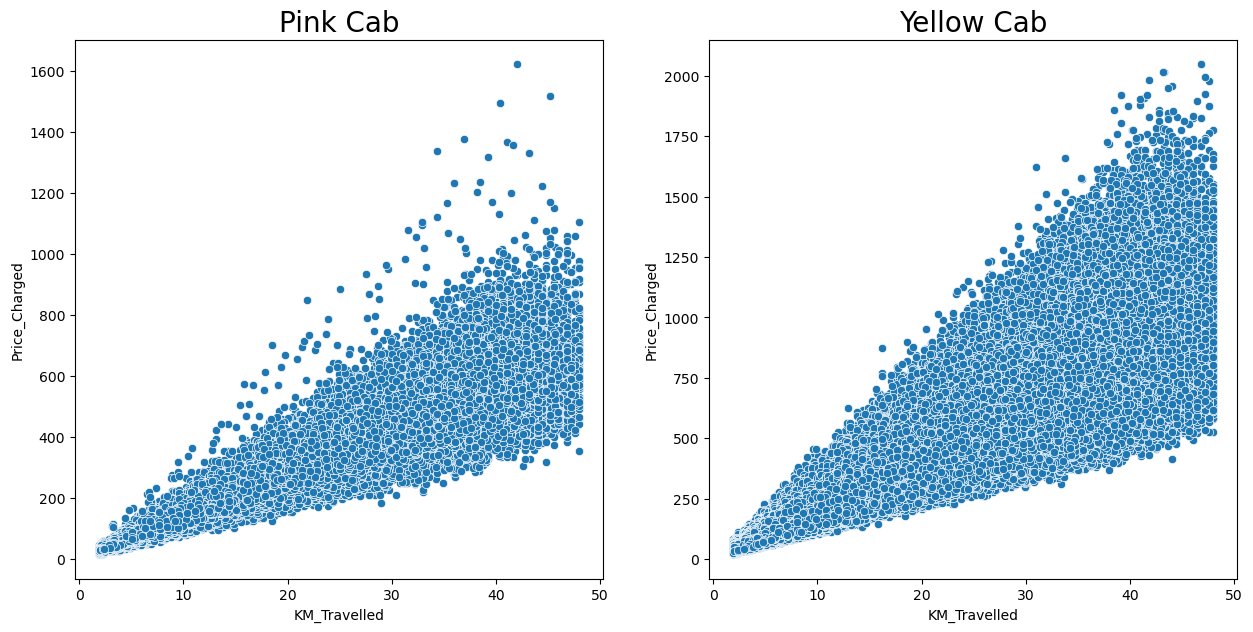

In [289]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(15, 7))

# Plot for Pink Cab
sns.scatterplot(data=PinkCab, y='Price_Charged', x='KM_Travelled', ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
# ax1.set_xlim(min(PinkCab['Price_Charged'].min(), YellowCab['Price_Charged'].min()) - 10, 
#              max(PinkCab['Price_Charged'].max(), YellowCab['Price_Charged'].max()) + 10)

# Plot for Yellow Cab
sns.scatterplot(data=YellowCab, y='Price_Charged', x='KM_Travelled', ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)

# Show the plot
plt.show()

In [290]:
PinkCab['KM_Travelled'].corr(PinkCab['Price_Charged'])

0.9277652782594862

In [291]:
YellowCab['KM_Travelled'].corr(YellowCab['Price_Charged'])


0.8597086294478473

In [292]:
#In summary, both correlations show a strong positive relationship between distance traveled and price charged in both cab services, with PinkCab showing a slightly stronger relationship than YellowCab.

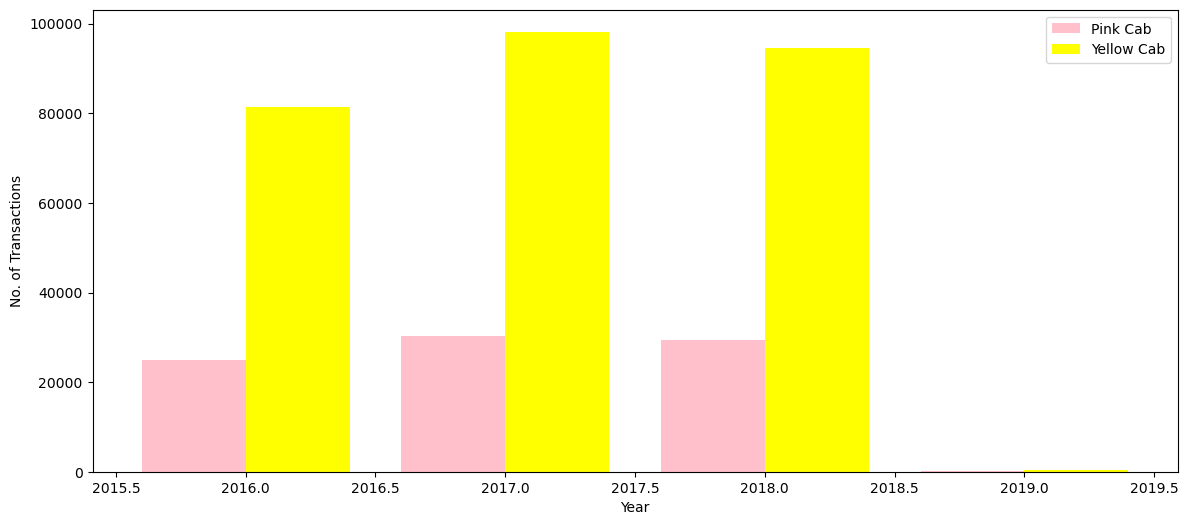

In [293]:
plot1 = cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
# plot1 = PinkCab.groupby('Year')['Transaction_ID'].count()
plot2 = cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.ylabel('No. of Transactions')
plt.xlabel('Year')
plt.legend()
plt.show()

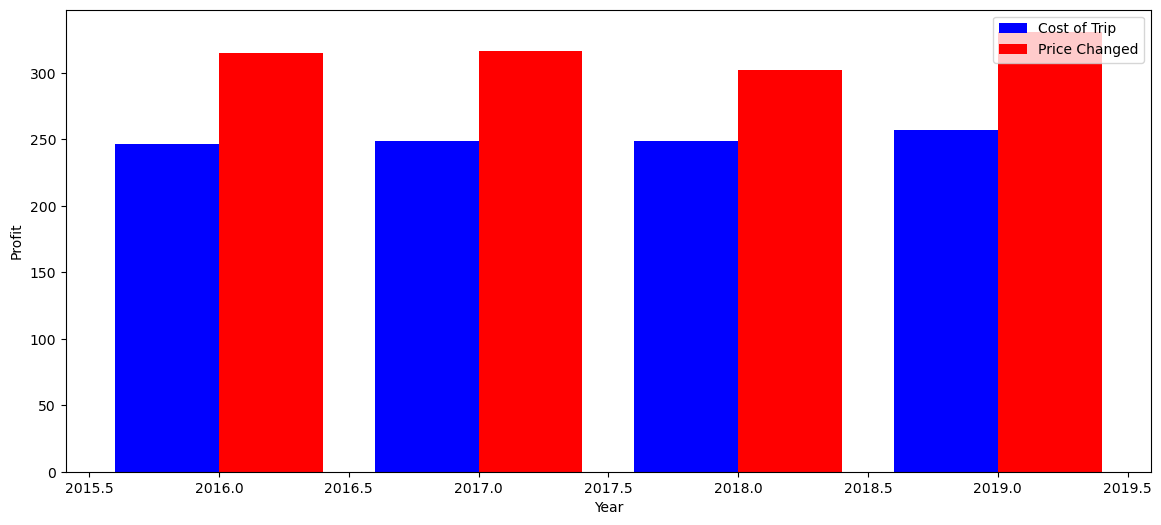

In [299]:
plot1 = cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
# plot1 = PinkCab.groupby('Year')['Transaction_ID'].count()
plot3 = cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot4 = cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()

plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='red', align='center',label='Price Changed')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.legend()
plt.show()

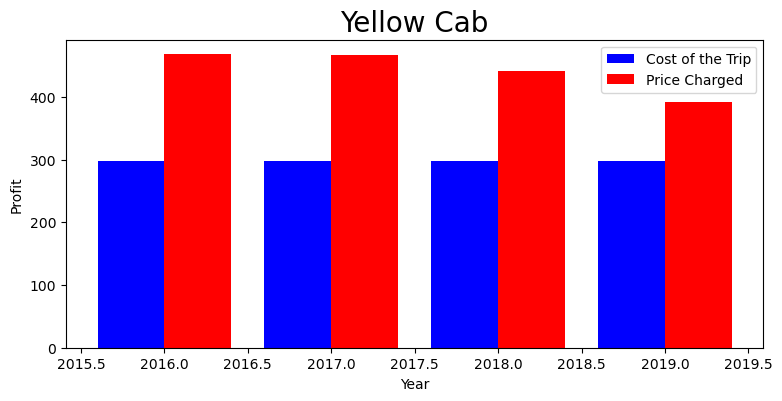

In [301]:
plot1 = cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plot3 = cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot4 = cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(9,4))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

In [ ]:
#The Yellow cab has a higher Profit Margin (Price Charged - Cost of Trip) compared to Pink cab

Text(0.5, 0, 'Pink Cab KM Travelled')

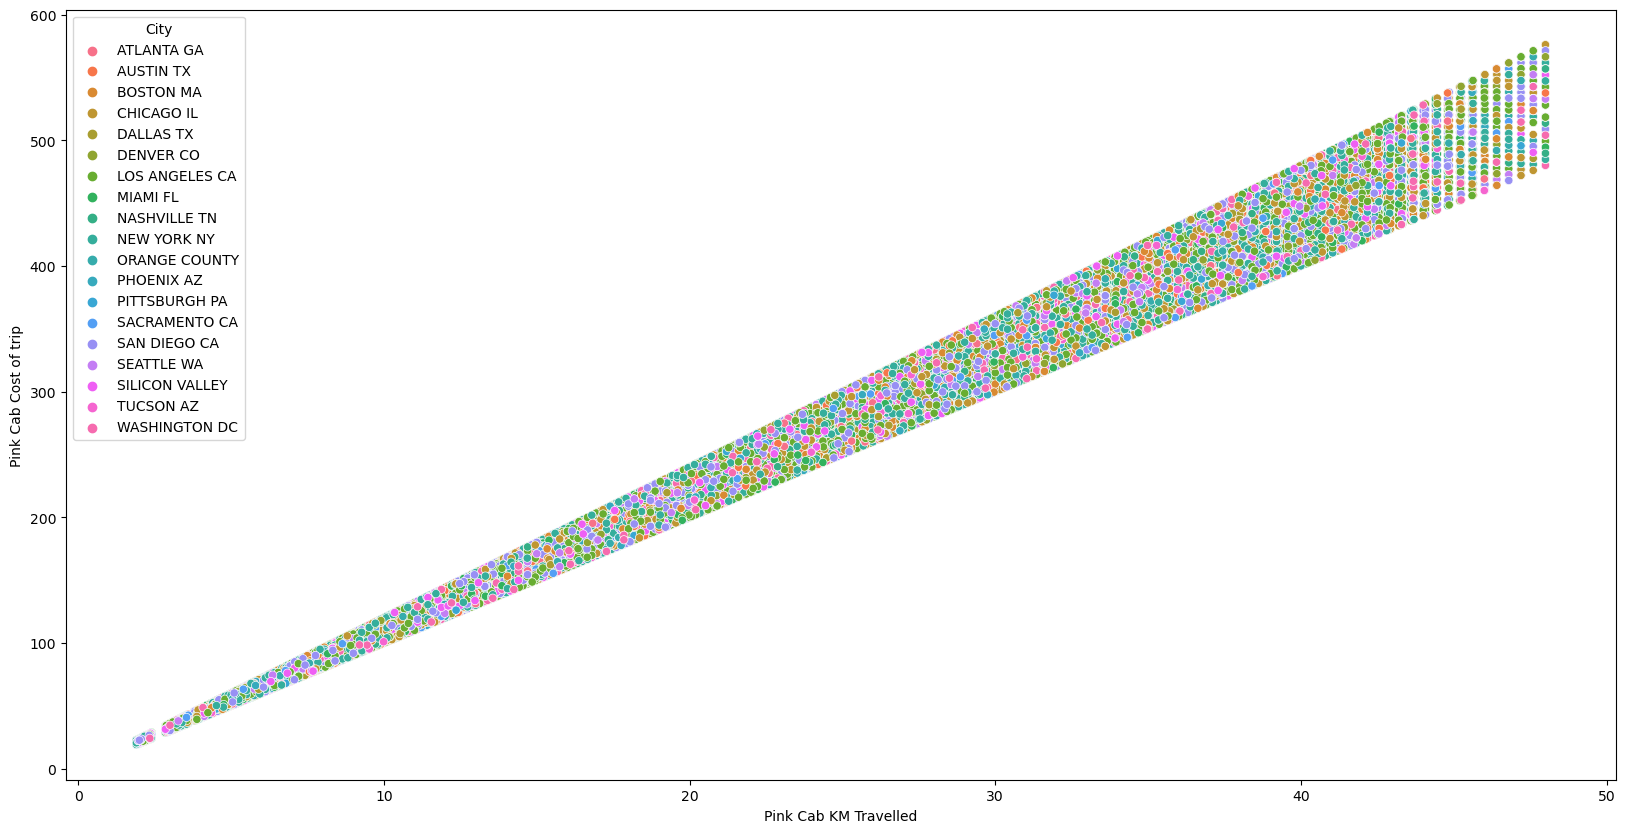

In [304]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab_data, x=PinkCab["KM_Travelled"], y=PinkCab["Cost_of_Trip"], hue="City")
plt.ylabel('Pink Cab Cost of trip')
plt.xlabel('Pink Cab KM Travelled')

Text(0.5, 0, 'Pink Cab KM Travelled')

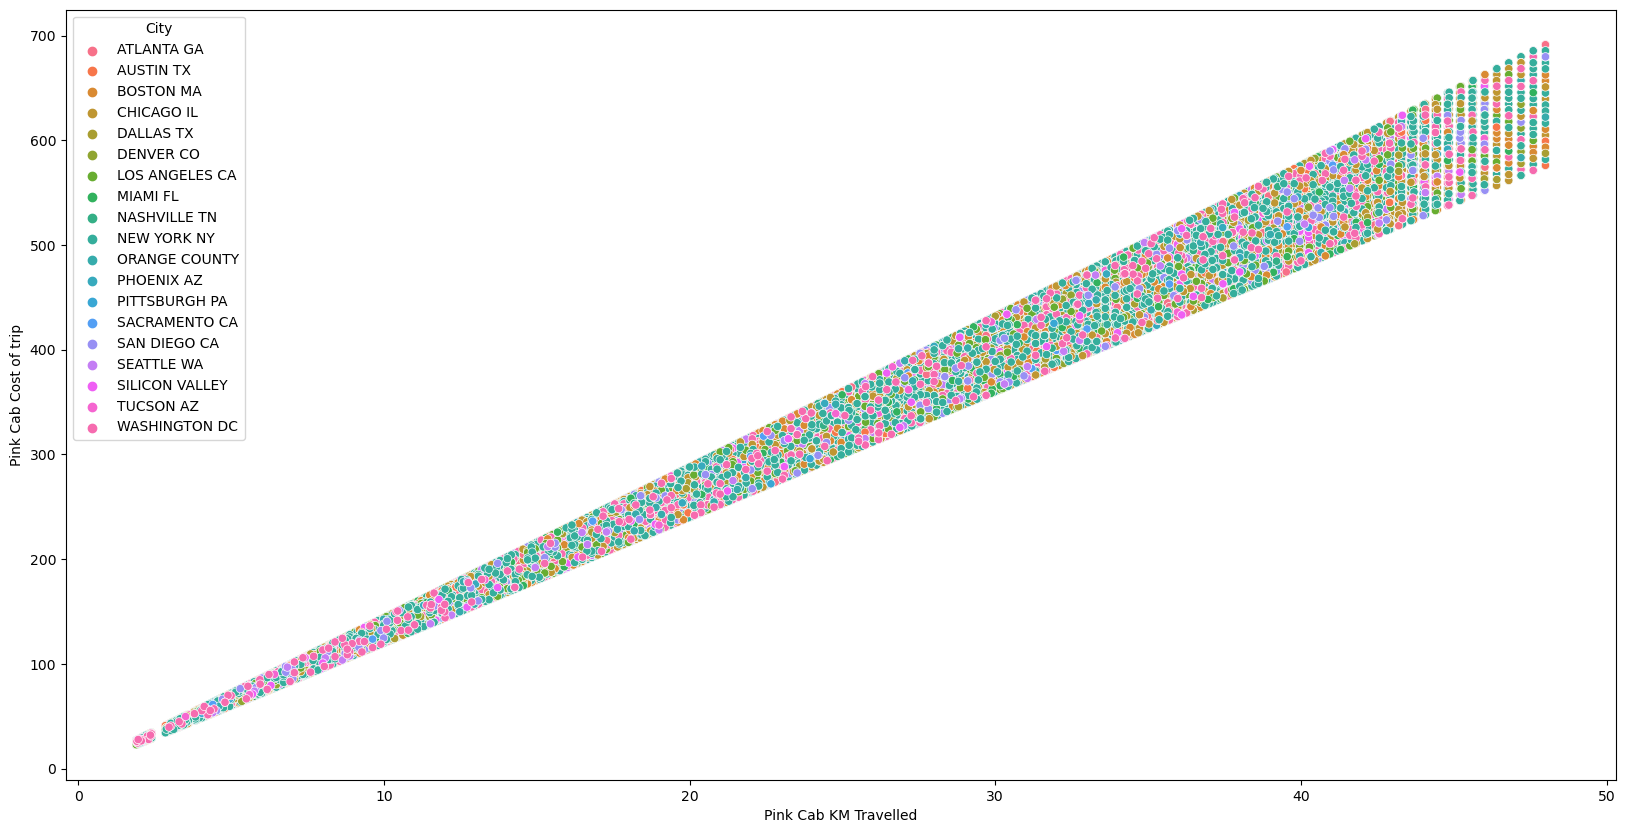

In [305]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab_data, x=YellowCab["KM_Travelled"], y=YellowCab["Cost_of_Trip"], hue="City")
plt.ylabel('Pink Cab Cost of trip')
plt.xlabel('Pink Cab KM Travelled')

Text(0.5, 0, 'Pink Cab KM Travelled')

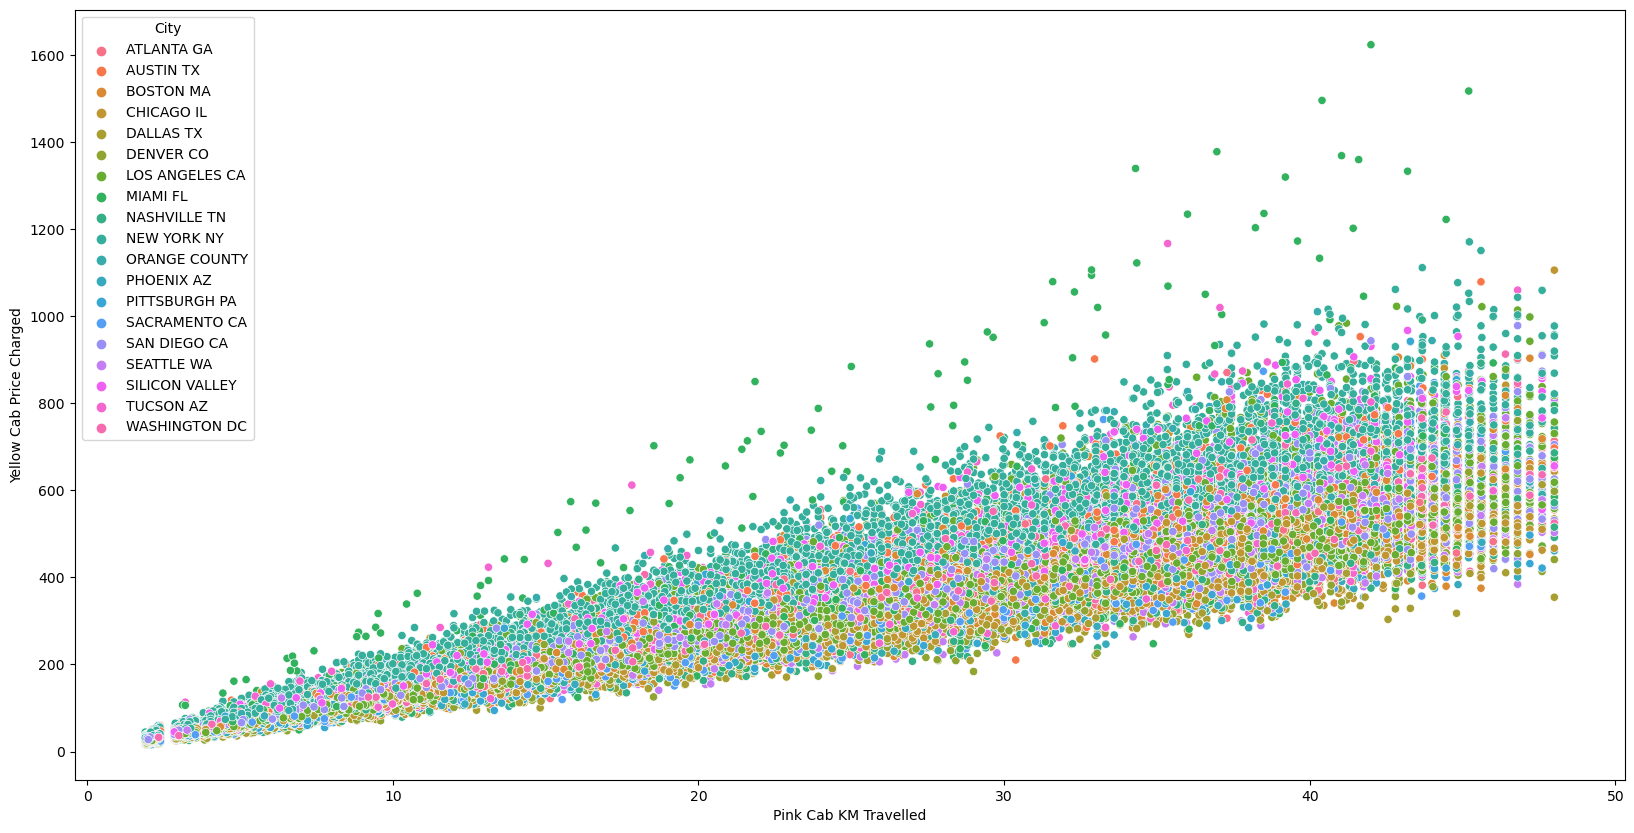

In [309]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab_data, x=PinkCab["KM_Travelled"], y=PinkCab["Price_Charged"], hue="City")
plt.ylabel('Yellow Cab Price Charged')
plt.xlabel('Pink Cab KM Travelled')

Text(0.5, 0, 'Pink Cab KM Travelled')

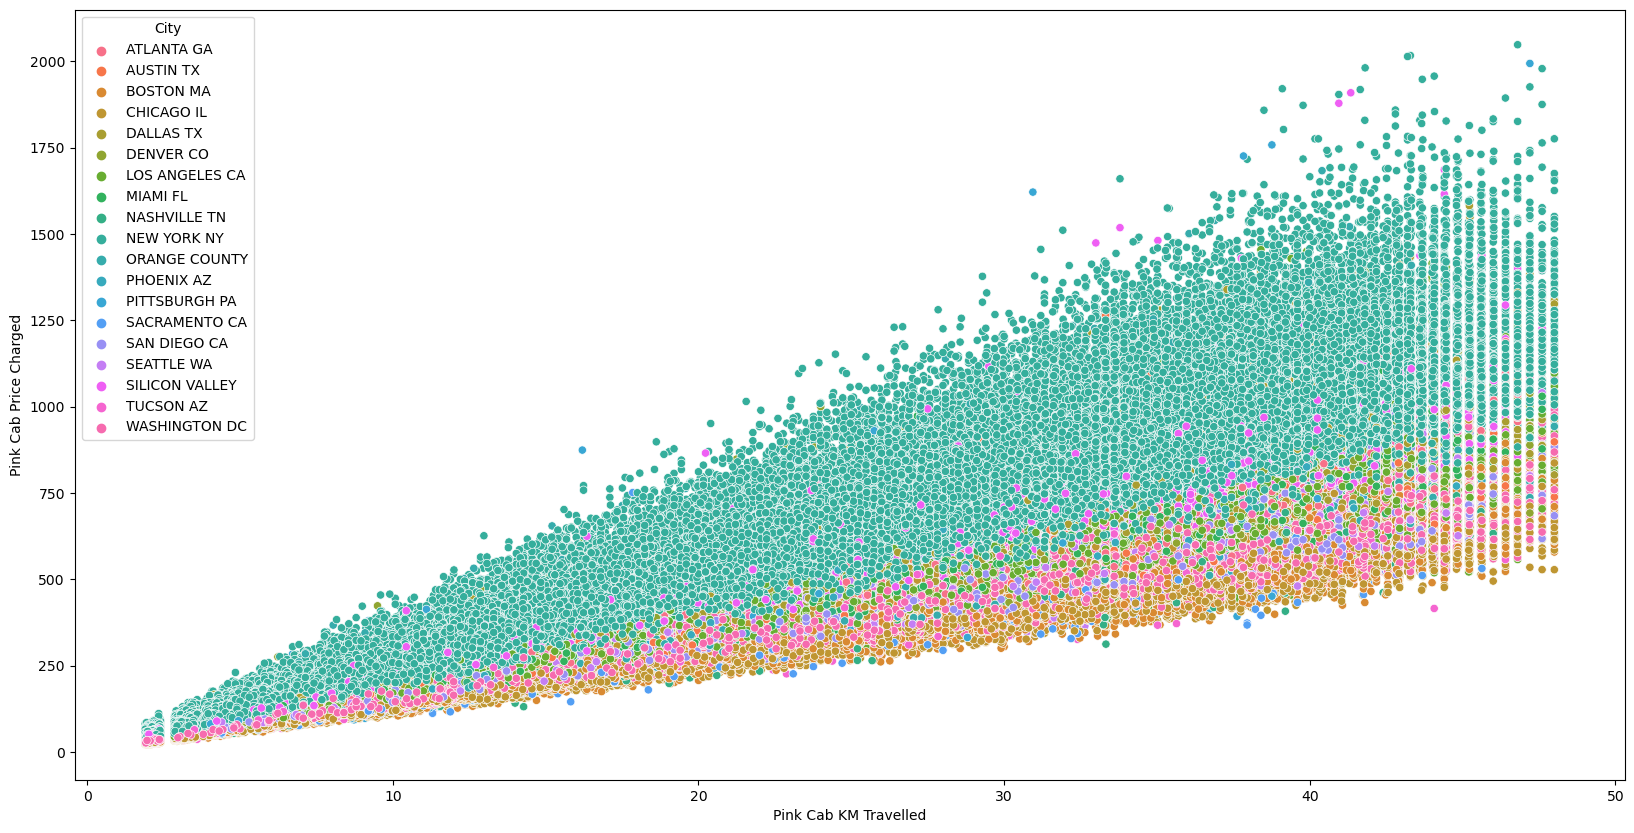

In [310]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cab_data, x=YellowCab["KM_Travelled"], y=YellowCab['Price_Charged'], hue="City")
plt.ylabel('Pink Cab Price Charged')
plt.xlabel('Pink Cab KM Travelled')

In [311]:
# From the graphs we see that for New York City the Yellow Cab price charged is more in comparison to the other cities 
#and for Pink cab all the cities have the same increase in prices with increase in distance 
# the outliers exist in both the graphs  which may be due to high end cars or weather.

In [ ]:
#Creating Master Data

In [322]:
transaction_id.rename(columns={'Transaction ID': 'Transaction_ID'}, inplace=True)


In [326]:
data1= cab_data.merge(transaction_id, on='Transaction_ID').merge(city_data, on='City')
data1.head()

Transaction_ID Date of Travel   Company        City  KM_Travelled  \
0        10000011     2016-01-10  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-08  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-04  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-09  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-05  Pink Cab  ATLANTA GA          8.73   

   Price_Charged  Cost_of_Trip  Day  Month  Year  Profit  Customer ID  \
0         370.95       313.635   10      1  2016  57.315        29290   
1         358.52       334.854    8      1  2016  23.666        27703   
2         125.20        97.632    4      1  2016  27.568        28712   
3         377.40       351.602    9      1  2016  25.798        28020   
4         114.62        97.776    5      1  2016  16.844        27182   

  Payment_Mode Population     Users  
0         Card   814,885    24,701   
1         Card   814,885    24,701   
2         Cash   814,885    24,701   
3         Cash   814,885    24,701   
4         Card   814,885    24,701

In [330]:
data1.rename(columns={'Customer ID': 'Customer_ID'}, inplace=True)
customer_id.rename(columns={'Customer ID': 'Customer_ID'}, inplace=True)



In [333]:
data_f=data1.merge(customer_id, on='Customer_ID')

In [334]:
data_f.head()

Transaction_ID Date of Travel     Company        City  KM_Travelled  \
0        10000011     2016-01-10    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-23  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-25  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-01-08    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-23  Yellow Cab  ATLANTA GA         36.38   

   Price_Charged  Cost_of_Trip  Day  Month  Year    Profit  Customer_ID  \
0         370.95      313.6350   10      1  2016   57.3150        29290   
1         598.70      317.4228   23      7  2018  281.2772        29290   
2         792.05      597.4020   25     11  2018  194.6480        29290   
3         358.52      334.8540    8      1  2016   23.6660        27703   
4         721.10      467.1192   23      4  2018  253.9808        27703   

  Payment_Mode Population     Users Gender  Age  Income (USD/Month)  
0         Card   814,885    24,701    Male   28               10813  
1         Cash   814,885    24,701    Male   28               10813  
2         Card   814,885    24,701    Male   28               10813  
3         Card   814,885    24,701    Male   27                9237  
4         Card   814,885    24,701    Male   27                9237

In [336]:
data_f.rename(columns={'Date of Travel': 'Date_of_Travel'}, inplace=True)
data_f.rename(columns={'Income (USD/Month)': 'Income'}, inplace=True)

data_f

Transaction_ID Date_of_Travel     Company           City  \
0             10000011     2016-01-10    Pink Cab     ATLANTA GA   
1             10351127     2018-07-23  Yellow Cab     ATLANTA GA   
2             10412921     2018-11-25  Yellow Cab     ATLANTA GA   
3             10000012     2016-01-08    Pink Cab     ATLANTA GA   
4             10320494     2018-04-23  Yellow Cab     ATLANTA GA   
...                ...            ...         ...            ...   
359387        10307228     2018-03-05  Yellow Cab  WASHINGTON DC   
359388        10319775     2018-04-15  Yellow Cab  WASHINGTON DC   
359389        10347676     2018-07-08  Yellow Cab  WASHINGTON DC   
359390        10358624     2018-08-04  Yellow Cab  WASHINGTON DC   
359391        10370709     2018-09-01  Yellow Cab  WASHINGTON DC   

        KM_Travelled  Price_Charged  Cost_of_Trip  Day  Month  Year    Profit  \
0              30.45         370.95      313.6350   10      1  2016   57.3150   
1              26.19         598.70      317.4228   23      7  2018  281.2772   
2              42.55         792.05      597.4020   25     11  2018  194.6480   
3              28.62         358.52      334.8540    8      1  2016   23.6660   
4              36.38         721.10      467.1192   23      4  2018  253.9808   
...              ...            ...           ...  ...    ...   ...       ...   
359387         38.40         668.93      525.3120    5      3  2018  143.6180   
359388          3.57          67.60       44.5536   15      4  2018   23.0464   
359389         23.46         331.97      337.8240    8      7  2018   -5.8540   
359390         27.60         358.23      364.3200    4      8  2018   -6.0900   
359391         34.24         453.11      427.3152    1      9  2018   25.7948   

        Customer_ID Payment_Mode Population      Users  Gender  Age  Income  
0             29290         Card   814,885     24,701     Male   28   10813  
1             29290         Cash   814,885     24,701     Male   28   10813  
2             29290         Card   814,885     24,701     Male   28   10813  
3             27703         Card   814,885     24,701     Male   27    9237  
4             27703         Card   814,885     24,701     Male   27    9237  
...             ...          ...        ...        ...     ...  ...     ...  
359387        51406         Cash   418,859    127,001   Female   29    6829  
359388        51406         Cash   418,859    127,001   Female   29    6829  
359389        51406         Card   418,859    127,001   Female   29    6829  
359390        51406         Cash   418,859    127,001   Female   29    6829  
359391        51406         Card   418,859    127,001   Female   29    6829  

[359392 rows x 18 columns]

In [337]:
data=data_f.reset_index()

In [383]:
#grouping of cities by state
data['State'] = data_f['City'].str.split().str[-1]
data.head()

index  Transaction_ID Date_of_Travel     Company        City  KM_Travelled  \
0      0        10000011     2016-01-10    Pink Cab  ATLANTA GA         30.45   
1      1        10351127     2018-07-23  Yellow Cab  ATLANTA GA         26.19   
2      2        10412921     2018-11-25  Yellow Cab  ATLANTA GA         42.55   
3      3        10000012     2016-01-08    Pink Cab  ATLANTA GA         28.62   
4      4        10320494     2018-04-23  Yellow Cab  ATLANTA GA         36.38   

   Price_Charged  Cost_of_Trip  Day  Month  Year    Profit  Customer_ID  \
0         370.95      313.6350   10      1  2016   57.3150        29290   
1         598.70      317.4228   23      7  2018  281.2772        29290   
2         792.05      597.4020   25     11  2018  194.6480        29290   
3         358.52      334.8540    8      1  2016   23.6660        27703   
4         721.10      467.1192   23      4  2018  253.9808        27703   

  Payment_Mode Population     Users Gender  Age  Income State  
0         Card   814,885    24,701    Male   28   10813    GA  
1         Cash   814,885    24,701    Male   28   10813    GA  
2         Card   814,885    24,701    Male   28   10813    GA  
3         Card   814,885    24,701    Male   27    9237    GA  
4         Card   814,885    24,701    Male   27    9237    GA

In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           359392 non-null  int64         
 1   Transaction_ID  359392 non-null  int64         
 2   Date_of_Travel  359392 non-null  datetime64[ns]
 3   Company         359392 non-null  object        
 4   City            359392 non-null  object        
 5   KM_Travelled    359392 non-null  float64       
 6   Price_Charged   359392 non-null  float64       
 7   Cost_of_Trip    359392 non-null  float64       
 8   Day             359392 non-null  int64         
 9   Month           359392 non-null  int64         
 10  Year            359392 non-null  int64         
 11  Profit          359392 non-null  float64       
 12  Customer_ID     359392 non-null  int64         
 13  Payment_Mode    359392 non-null  object        
 14  Population      359392 non-null  obj

In [375]:
data.describe(include='all').T

/var/folders/_n/q8m30_td1vz_7986hph1s4wh0000gp/T/ipykernel_25790/3536075253.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all').T


count unique                  top    freq      first  \
index           359392.0    NaN                  NaN     NaN        NaT   
Transaction_ID  359392.0    NaN                  NaN     NaN        NaT   
Date_of_Travel    359392   1095  2018-01-07 00:00:00    2022 2016-01-04   
Company           359392      2           Yellow Cab  274681        NaT   
City              359392     19          NEW YORK NY   99885        NaT   
KM_Travelled    359392.0    NaN                  NaN     NaN        NaT   
Price_Charged   359392.0    NaN                  NaN     NaN        NaT   
Cost_of_Trip    359392.0    NaN                  NaN     NaN        NaT   
Day             359392.0    NaN                  NaN     NaN        NaT   
Month           359392.0    NaN                  NaN     NaN        NaT   
Year            359392.0    NaN                  NaN     NaN        NaT   
Profit          359392.0    NaN                  NaN     NaN        NaT   
Customer_ID     359392.0    NaN                  NaN     NaN        NaT   
Payment_Mode      359392      2                 Card  215504        NaT   
Population        359392     19           8,405,837    99885        NaT   
Users             359392     19             302,149    99885        NaT   
Gender            359392      2                 Male  205912        NaT   
Age             359392.0    NaN                  NaN     NaN        NaT   
Income          359392.0    NaN                  NaN     NaN        NaT   
State             359392     15                   NY   99885        NaT   

                     last             mean            std         min  \
index                 NaT         179695.5  103747.678309         0.0   
Transaction_ID        NaT  10220761.185363  126805.803715  10000011.0   
Date_of_Travel 2019-01-02              NaN            NaN         NaN   
Company               NaT              NaN            NaN         NaN   
City                  NaT              NaN            NaN         NaN   
KM_Travelled          NaT        22.567254      12.233526         1.9   
Price_Charged         NaT       423.443311     274.378911        15.6   
Cost_of_Trip          NaT       286.190113     157.993661        19.0   
Day                   NaT        15.659784       8.797606         1.0   
Month                 NaT         7.475851       3.464767         1.0   
Year                  NaT      2017.052628       0.802452      2016.0   
Profit                NaT       137.253198      160.31184     -220.06   
Customer_ID           NaT     19191.652115   21012.412463         1.0   
Payment_Mode          NaT              NaN            NaN         NaN   
Population            NaT              NaN            NaN         NaN   
Users                 NaT              NaN            NaN         NaN   
Gender                NaT              NaN            NaN         NaN   
Age                   NaT        35.336705      12.594234        18.0   
Income                NaT     15048.822937    7969.409482      2000.0   
State                 NaT              NaN            NaN         NaN   

                        25%         50%          75%         max  
index              89847.75    179695.5    269543.25    359391.0  
Transaction_ID  10110809.75  10221035.5  10330937.25  10440107.0  
Date_of_Travel          NaN         NaN          NaN         NaN  
Company                 NaN         NaN          NaN         NaN  
City                    NaN         NaN          NaN         NaN  
KM_Travelled           12.0       22.44        32.96        48.0  
Price_Charged      206.4375      386.36       583.66     2048.03  
Cost_of_Trip          151.2      282.48     413.6832       691.2  
Day                     8.0        16.0         23.0        31.0  
Month                   5.0         8.0         10.0        12.0  
Year                 2016.0      2017.0       2018.0      2019.0  
Profit               28.012      81.962       190.03    1463.966  
Customer_ID          2705.0      7459.

In [376]:
categorical_col=data.select_dtypes(include=['object']).columns
categorical_col

Index(['Company', 'City', 'Payment_Mode', 'Population', 'Users', 'Gender',
       'State'],
      dtype='object')

In [377]:
numerical_col=data.select_dtypes(include=np.number).columns.tolist()
numerical_col

['index',
 'Transaction_ID',
 'KM_Travelled',
 'Price_Charged',
 'Cost_of_Trip',
 'Day',
 'Month',
 'Year',
 'Profit',
 'Customer_ID',
 'Age',
 'Income']

In [378]:
group=data.groupby('Company')['Profit'].sum().reset_index()
group

Company        Profit
0    Pink Cab  5.307328e+06
1  Yellow Cab  4.402037e+07

[Text(0, 0, '5.30733e+06'), Text(0, 0, '4.40204e+07')]

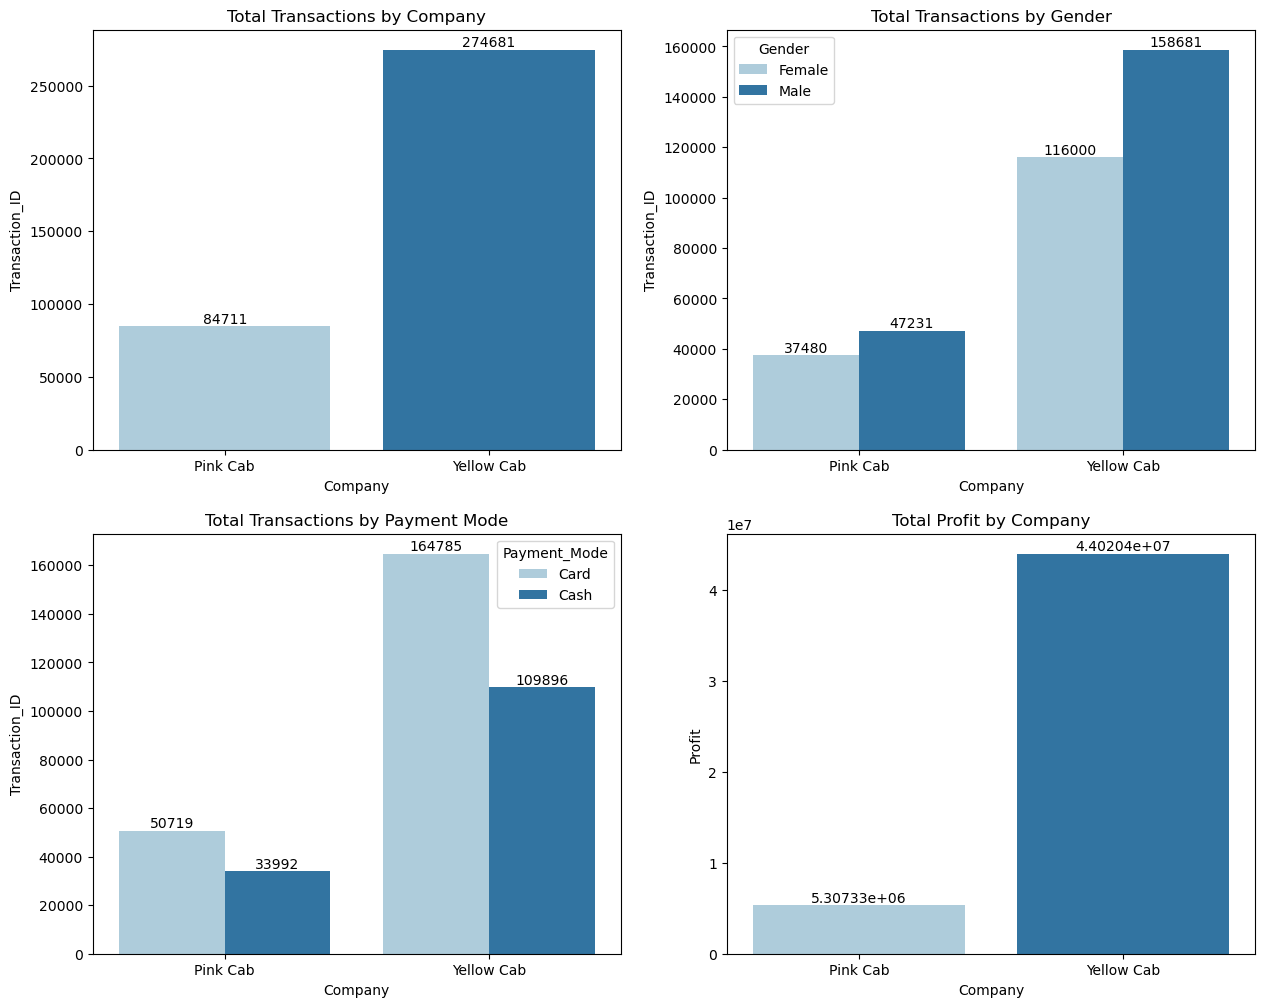

In [379]:
fig = plt.figure(figsize=(15,12))

fig.add_subplot(2,2,1)
group = data.groupby('Company')['Transaction_ID'].count().reset_index()
ax = sns.barplot(data =group, x= 'Company', y= 'Transaction_ID',palette="Paired")
plt.title("Total Transactions by Company")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])

fig.add_subplot(2,2,2)
group = data.groupby(by=['Company','Gender'])['Transaction_ID'].count().reset_index()
ax = sns.barplot(data =group, x="Company", hue="Gender", y='Transaction_ID',palette="Paired")
plt.title("Total Transactions by Gender")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])


fig.add_subplot(2,2,3)
group = data.groupby(by=['Company','Payment_Mode'])['Transaction_ID'].count().reset_index()
ax = sns.barplot(data =group, x="Company", hue="Payment_Mode", y='Transaction_ID',palette="Paired")
plt.title("Total Transactions by Payment Mode")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

fig.add_subplot(2,2,4)
group = data.groupby(by=['Company'])['Profit'].sum().reset_index()
ax = sns.barplot(data =group, x="Company", y='Profit',palette="Paired")
plt.title("Total Profit by Company")
#sns.set_style("whitegrid")
ax.bar_label(ax.containers[0])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'NEW YORK NY'),
  Text(1, 0, 'CHICAGO IL'),
  Text(2, 0, 'LOS ANGELES CA'),
  Text(3, 0, 'WASHINGTON DC'),
  Text(4, 0, 'BOSTON MA'),
  Text(5, 0, 'SAN DIEGO CA'),
  Text(6, 0, 'SILICON VALLEY'),
  Text(7, 0, 'SEATTLE WA'),
  Text(8, 0, 'ATLANTA GA'),
  Text(9, 0, 'DALLAS TX'),
  Text(10, 0, 'MIAMI FL'),
  Text(11, 0, 'AUSTIN TX'),
  Text(12, 0, 'ORANGE COUNTY'),
  Text(13, 0, 'DENVER CO'),
  Text(14, 0, 'NASHVILLE TN'),
  Text(15, 0, 'SACRAMENTO CA'),
  Text(16, 0, 'PHOENIX AZ'),
  Text(17, 0, 'TUCSON AZ'),
  Text(18, 0, 'PITTSBURGH PA')])

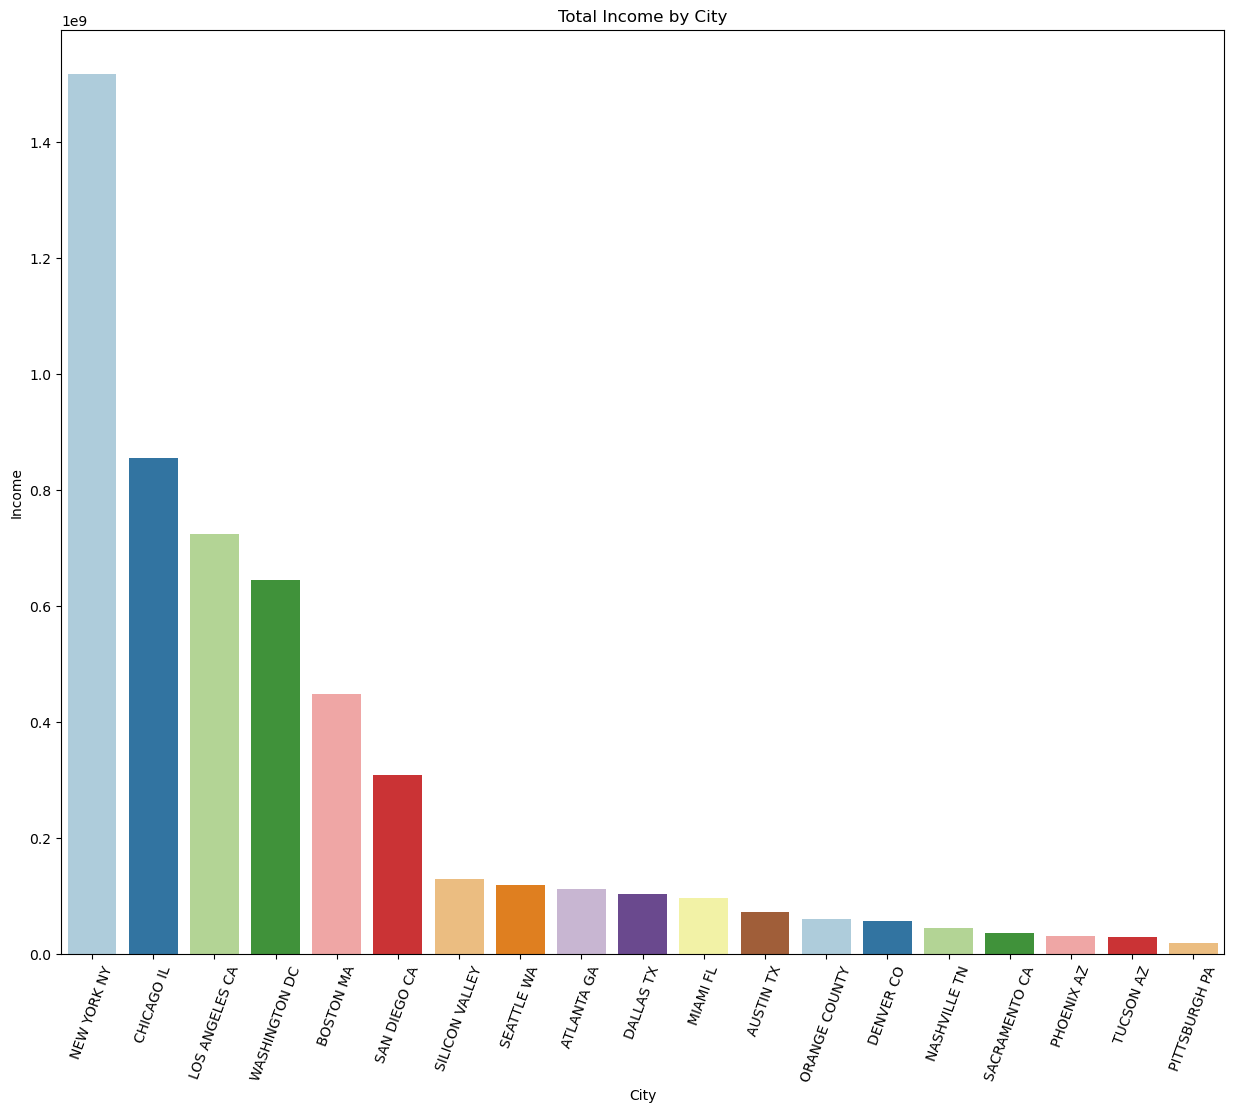

In [380]:
fig = plt.figure(figsize=(15,12))

group=data.groupby("City")["Income"].sum().sort_values(ascending=False).reset_index()
ax=sns.barplot(data=group, x='City', y='Income', palette='Paired')
plt.title("Total Income by City")
plt.xticks(rotation=70)



Text(0.5, 1.0, 'Total Population by City')

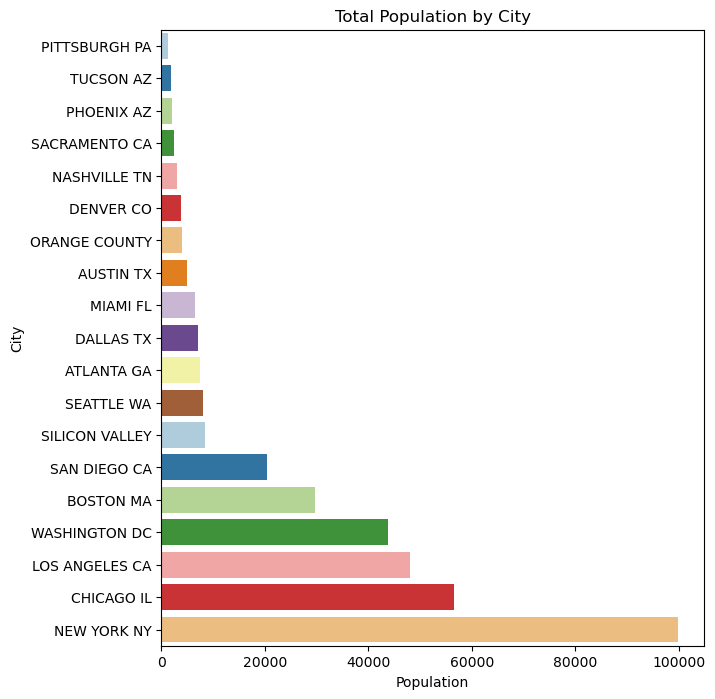

In [381]:
fig = plt.figure(figsize=(7,8))

group=data.groupby("City").agg({"Population":"count"}).sort_values("Population").reset_index()
ax=sns.barplot(data=group, x='Population', y='City', palette='Paired')
plt.title("Total Population by City")
# plt.xticks(rotation=70)



In [382]:
data.head()

index  Transaction_ID Date_of_Travel     Company        City  KM_Travelled  \
0      0        10000011     2016-01-10    Pink Cab  ATLANTA GA         30.45   
1      1        10351127     2018-07-23  Yellow Cab  ATLANTA GA         26.19   
2      2        10412921     2018-11-25  Yellow Cab  ATLANTA GA         42.55   
3      3        10000012     2016-01-08    Pink Cab  ATLANTA GA         28.62   
4      4        10320494     2018-04-23  Yellow Cab  ATLANTA GA         36.38   

   Price_Charged  Cost_of_Trip  Day  Month  Year    Profit  Customer_ID  \
0         370.95      313.6350   10      1  2016   57.3150        29290   
1         598.70      317.4228   23      7  2018  281.2772        29290   
2         792.05      597.4020   25     11  2018  194.6480        29290   
3         358.52      334.8540    8      1  2016   23.6660        27703   
4         721.10      467.1192   23      4  2018  253.9808        27703   

  Payment_Mode Population     Users Gender  Age  Income State  
0         Card   814,885    24,701    Male   28   10813    GA  
1         Cash   814,885    24,701    Male   28   10813    GA  
2         Card   814,885    24,701    Male   28   10813    GA  
3         Card   814,885    24,701    Male   27    9237    GA  
4         Card   814,885    24,701    Male   27    9237    GA

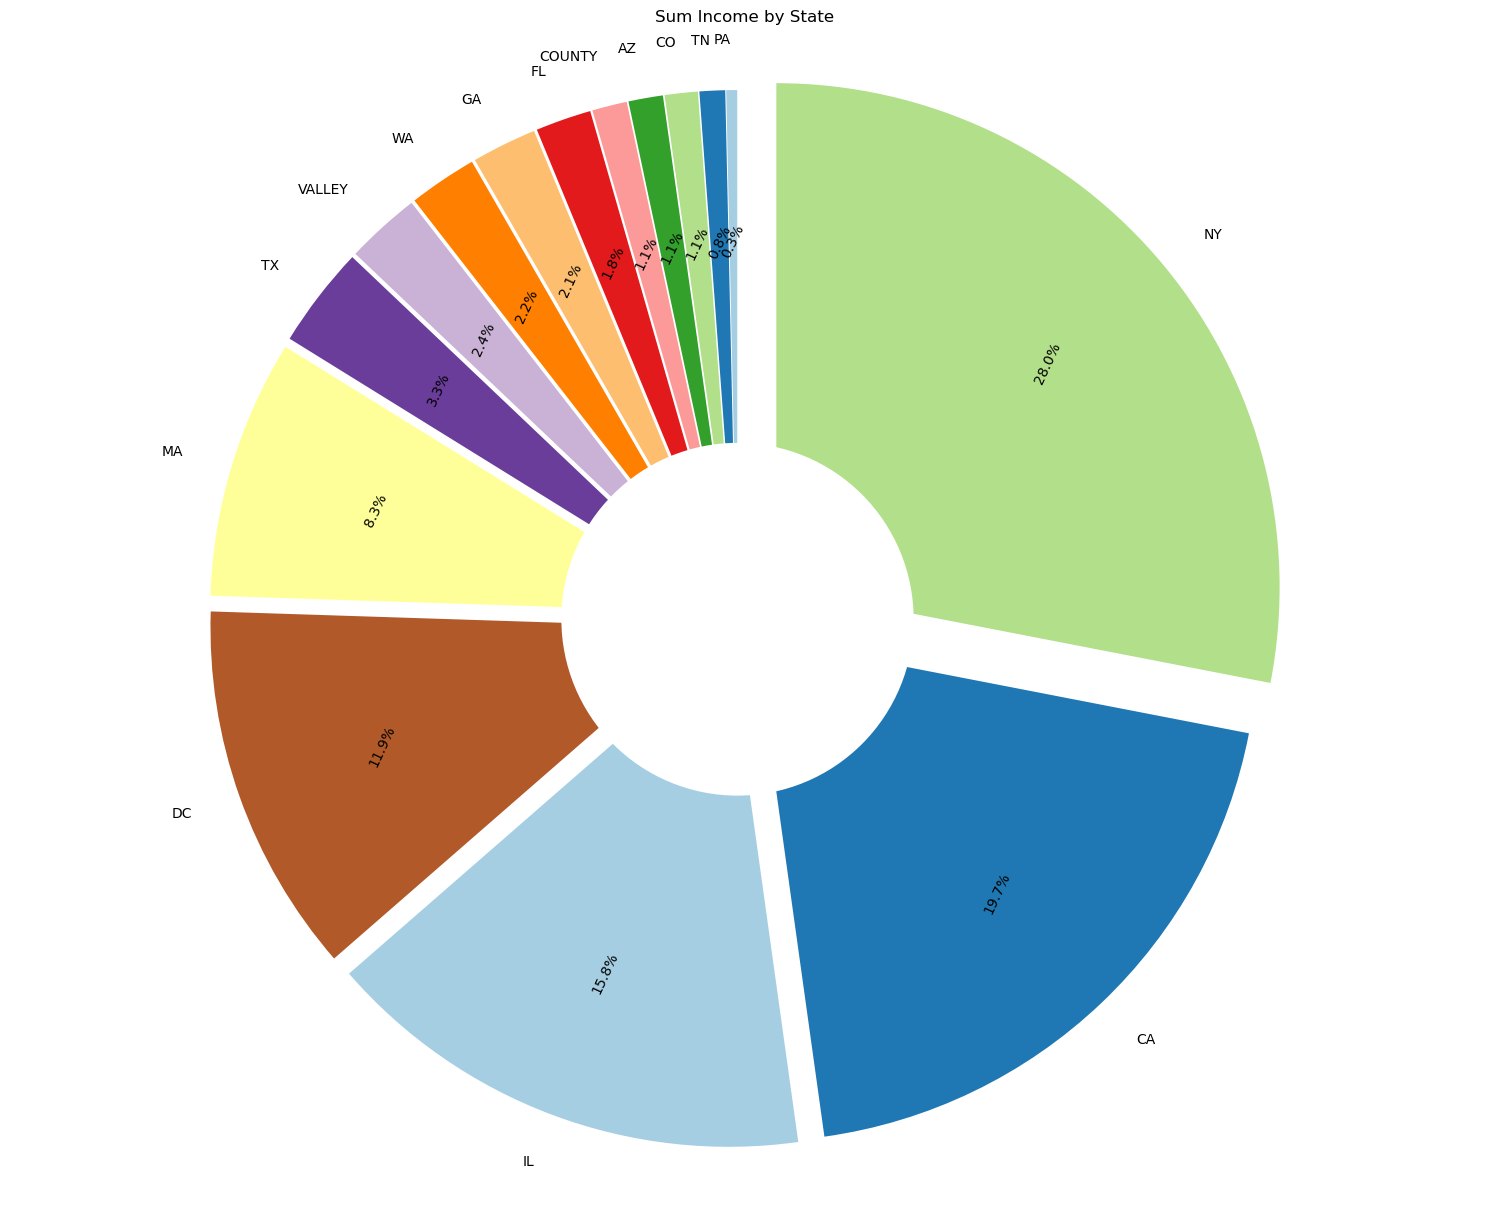

In [390]:
group=data.groupby("State").agg({"Income":"sum"}).sort_values("Income").reset_index()
# group.columns=['State','Income']

fig, ax = plt.subplots(figsize=(15,12))

textprops = {"fontsize":10}
# explodes = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2]
# explodes = [0.1, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
explodes = [0.1] * (len(group) - 1) + [0.2]


pie_properties=ax.pie(data=group, x='Income', labels= 'State' , pctdistance=0.7, 
               autopct='%1.1f%%', 
               colors=sns.color_palette("Paired"),radius = 2,  
               explode = explodes, shadow=False, startangle=90 , textprops =textprops);

centre_circle=plt.Circle((0,0),0.70,fc='white')

fraction_text_list = pie_properties[2]
for text in fraction_text_list:
    text.set_rotation(65)
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
ax.axis('equal')

plt.tight_layout()
plt.title ("Sum Income by State")

plt.show()



(array([0, 1]), [Text(0, 0, 'Yellow Cab'), Text(1, 0, 'Pink Cab')])

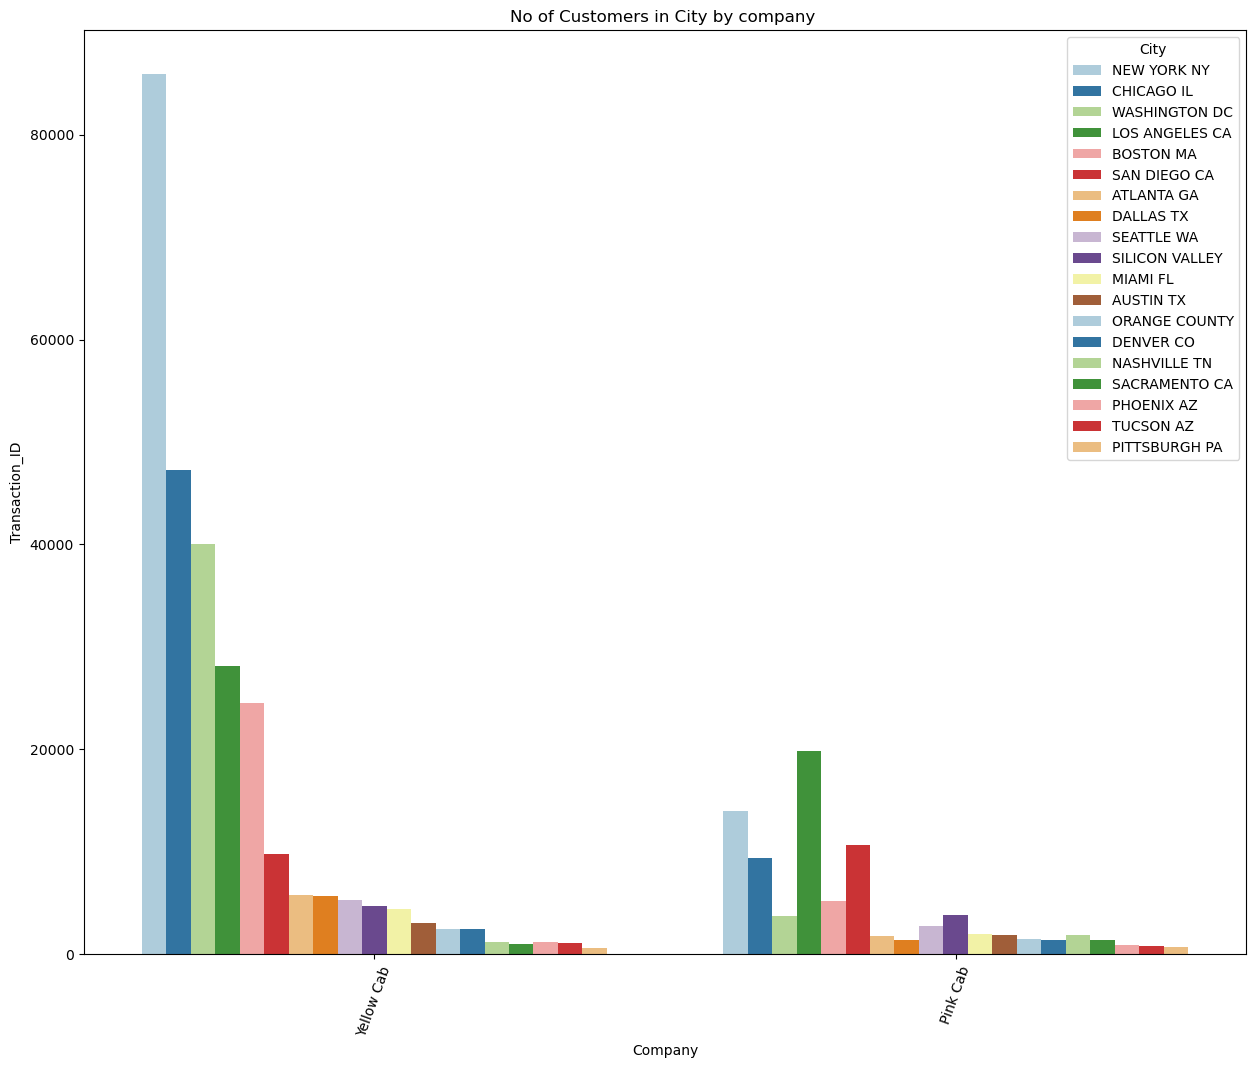

In [394]:
fig = plt.figure(figsize=(15,12))

group=data.groupby(["City","Company"])["Transaction_ID"].count().sort_values(ascending=False).reset_index()
ax=sns.barplot(data=group, x='Company', hue="City", y='Transaction_ID', palette='Paired')
plt.title("No of Customers in City by company ")
plt.xticks(rotation=70)

In [391]:
data.head()

index  Transaction_ID Date_of_Travel     Company        City  KM_Travelled  \
0      0        10000011     2016-01-10    Pink Cab  ATLANTA GA         30.45   
1      1        10351127     2018-07-23  Yellow Cab  ATLANTA GA         26.19   
2      2        10412921     2018-11-25  Yellow Cab  ATLANTA GA         42.55   
3      3        10000012     2016-01-08    Pink Cab  ATLANTA GA         28.62   
4      4        10320494     2018-04-23  Yellow Cab  ATLANTA GA         36.38   

   Price_Charged  Cost_of_Trip  Day  Month  Year    Profit  Customer_ID  \
0         370.95      313.6350   10      1  2016   57.3150        29290   
1         598.70      317.4228   23      7  2018  281.2772        29290   
2         792.05      597.4020   25     11  2018  194.6480        29290   
3         358.52      334.8540    8      1  2016   23.6660        27703   
4         721.10      467.1192   23      4  2018  253.9808        27703   

  Payment_Mode Population     Users Gender  Age  Income State  
0         Card   814,885    24,701    Male   28   10813    GA  
1         Cash   814,885    24,701    Male   28   10813    GA  
2         Card   814,885    24,701    Male   28   10813    GA  
3         Card   814,885    24,701    Male   27    9237    GA  
4         Card   814,885    24,701    Male   27    9237    GA

Text(0.5, 1.0, 'KM Travelled by company ')

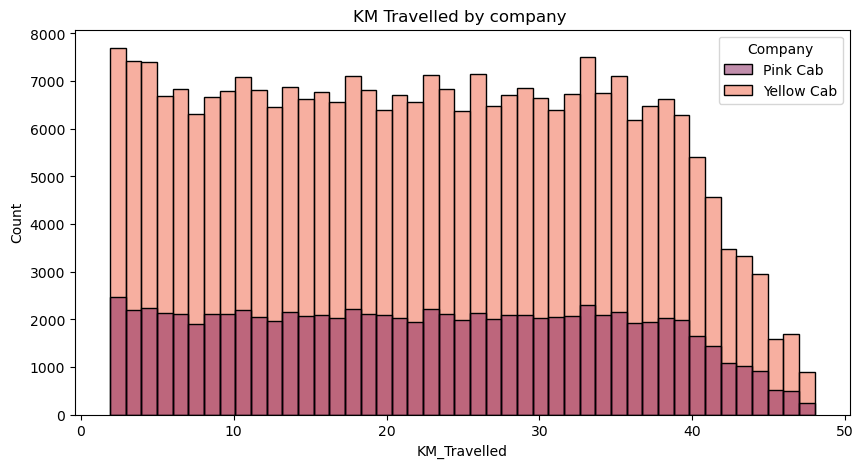

In [408]:
fig = plt.figure(figsize=(10,5))

# group=data.groupby(["Company"])["KM_Travelled"].count().sort_values(ascending=False).reset_index()

selected_palette = sns.color_palette('Paired', n_colors=12)  # Adjust n_colors based on how many distinct colors you need
selected_colors = selected_palette[8:10]  # Choose the first two colors, or other indices as needed

ax=sns.histplot(data=data, x='KM_Travelled', hue="Company",bins=45, palette="rocket")
plt.title("KM Travelled by company ")
# plt.xticks(rotation=70)

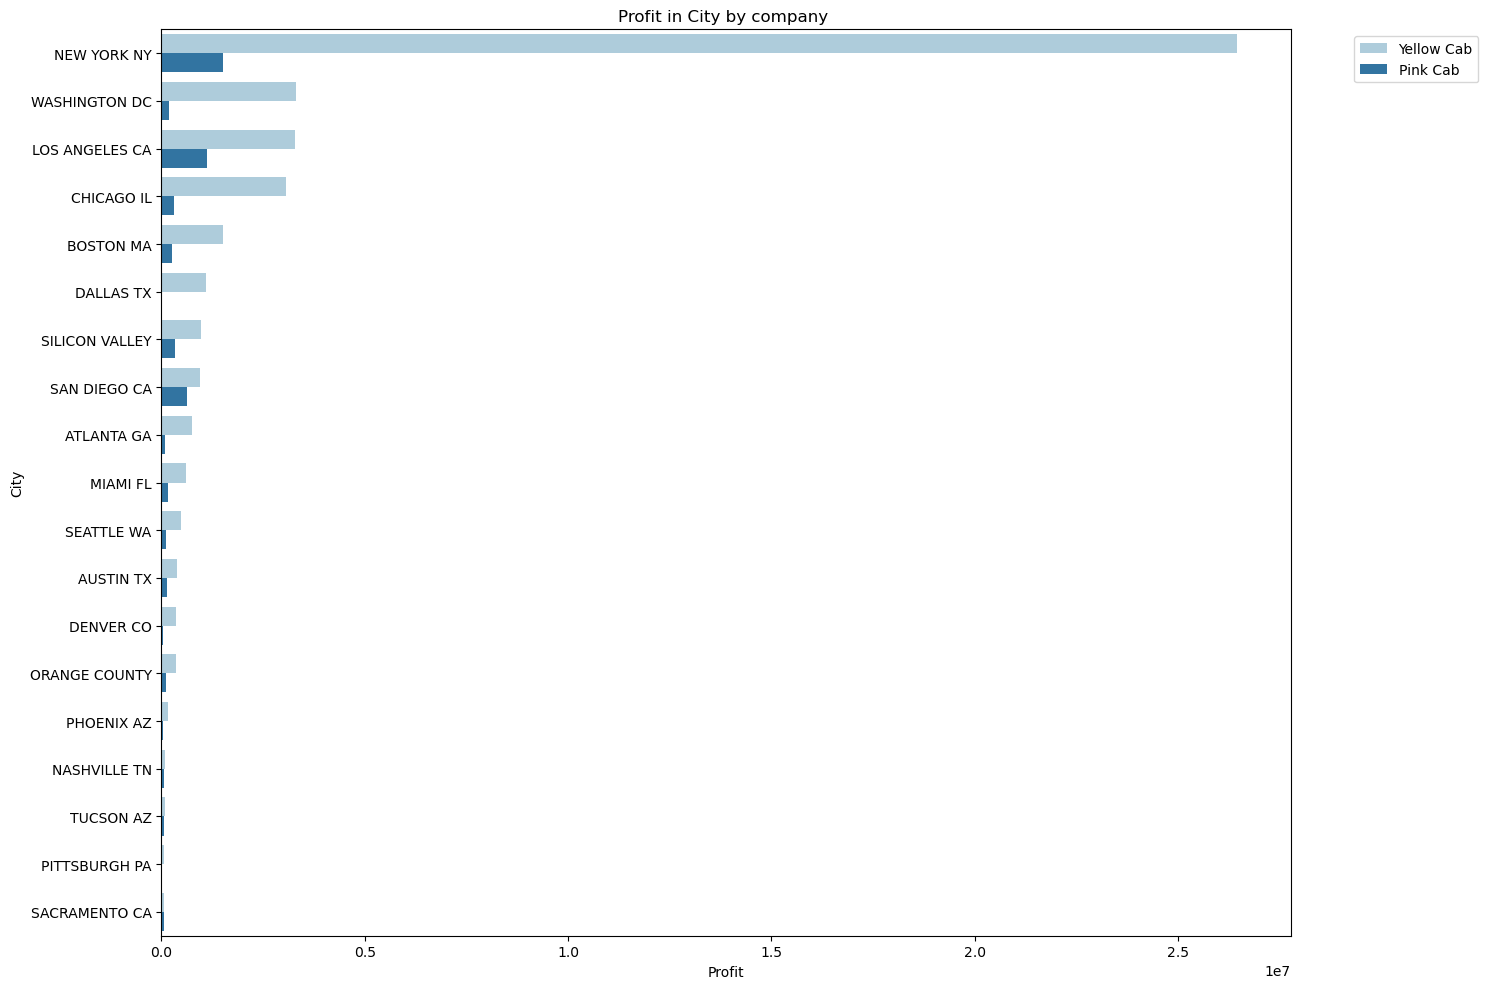

In [414]:
fig = plt.figure(figsize=(15,10))

group=data.groupby(["City","Company"])["Profit"].sum().sort_values(ascending=False).reset_index()
ax=sns.barplot(data=group, x='Profit', hue="Company", y='City', palette='Paired')
plt.title("Profit in City by company ")
# plt.xticks(rotation=70)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Adjust layout to fit everything
plt.tight_layout()


In [417]:
agg_dict={
    "Transaction_ID":"count"
}
group_g= data.groupby(['Company', 'Gender']).agg(agg_dict).sort_values(by='Transaction_ID').reset_index()
group_g.rename({'Company':'Company','Gender':'Gender','Transaction_ID':'Count'}, axis=1, inplace=True)
group_g.head()

Company  Gender   Count
0    Pink Cab  Female   37480
1    Pink Cab    Male   47231
2  Yellow Cab  Female  116000
3  Yellow Cab    Male  158681

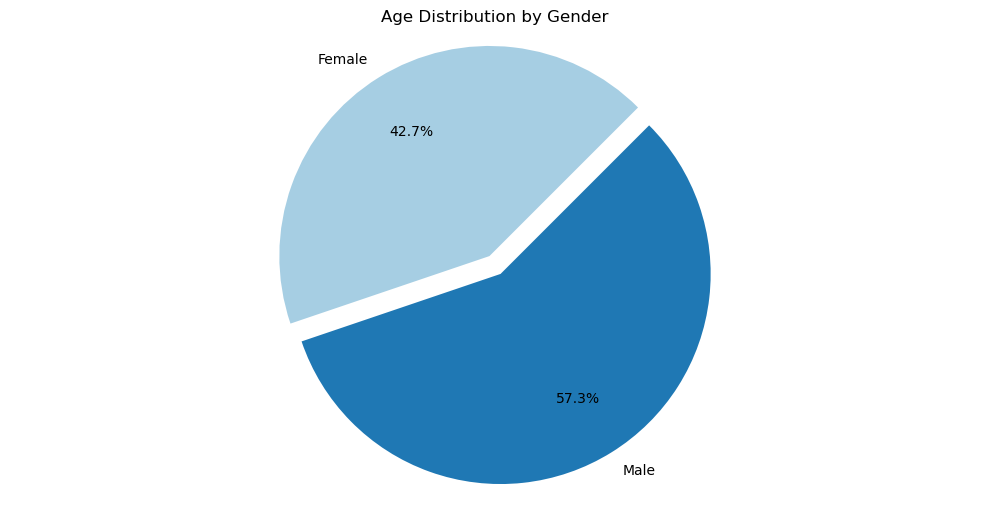

In [419]:
group=data.groupby(["Gender"])["Age"].count().reset_index()
# group.columns=['State','Income']

fig, ax = plt.subplots(figsize=(10,5))

textprops = {"fontsize":10}
# explodes = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2]
# explodes = [0.1, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
explodes = [0.1] * (len(group))


pie_properties=ax.pie(data=group, x='Age', labels= 'Gender' , pctdistance=0.7, 
               autopct='%1.1f%%', 
               colors=sns.color_palette("Paired"),radius = 2,  
               explode = explodes, shadow=False, startangle=45 , textprops =textprops);

centre_circle=plt.Circle((0,0),0.70,fc='white')

# fraction_text_list = pie_properties[2]
# for text in fraction_text_list:
#     text.set_rotation(65)
# fig=plt.gcf()
# fig.gca().add_artist(centre_circle)
ax.axis('equal')

plt.tight_layout()
plt.title ("Age Distribution by Gender")

plt.show()


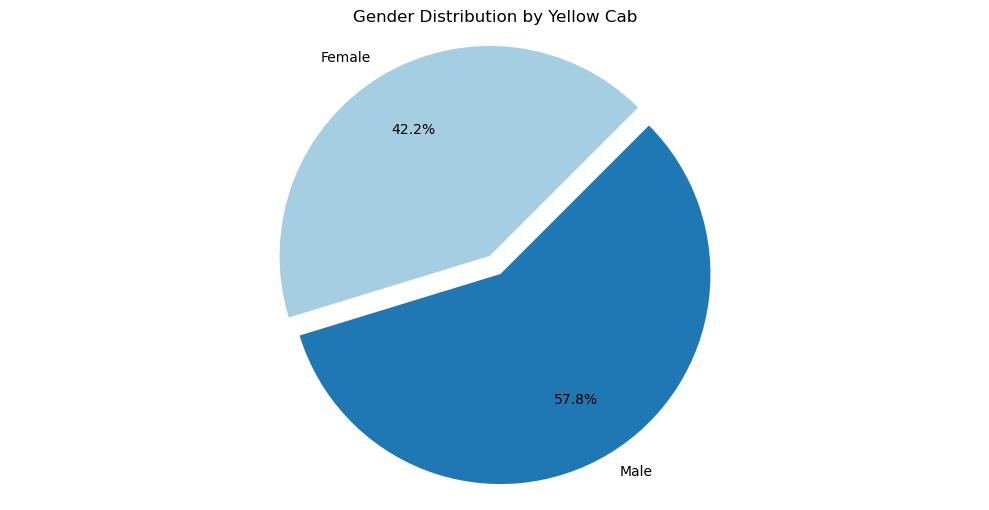

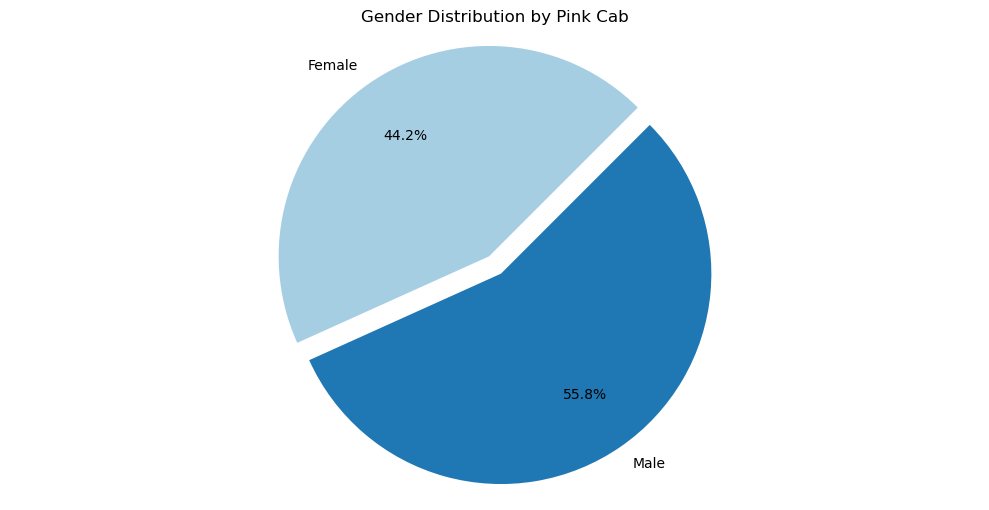

In [426]:
#For Yellow Cab
group=group_g[group_g['Company']=='Yellow Cab']
# group.columns=['State','Income']

fig, ax = plt.subplots(figsize=(10,5))

textprops = {"fontsize":10}
# explodes = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2]
# explodes = [0.1, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
explodes = [0.1] * (len(group))


pie_properties=ax.pie(data=group, x='Count', labels= 'Gender' , pctdistance=0.7, 
               autopct='%1.1f%%', 
               colors=sns.color_palette("Paired"),radius = 2,  
               explode = explodes, shadow=False, startangle=45 , textprops =textprops);

centre_circle=plt.Circle((0,0),0.70,fc='white')

# fraction_text_list = pie_properties[2]
# for text in fraction_text_list:
#     text.set_rotation(65)
# fig=plt.gcf()
# fig.gca().add_artist(centre_circle)
ax.axis('equal')

plt.tight_layout()
plt.title ("Gender Distribution by Yellow Cab")

plt.show()

#For Pink Cab
group=group_g[group_g['Company']=='Pink Cab']
# group.columns=['State','Income']

fig, ax = plt.subplots(figsize=(10,5))

textprops = {"fontsize":10}
# explodes = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2]
# explodes = [0.1, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
explodes = [0.1] * (len(group))


pie_properties=ax.pie(data=group, x='Count', labels= 'Gender' , pctdistance=0.7, 
               autopct='%1.1f%%', 
               colors=sns.color_palette("Paired"),radius = 2,  
               explode = explodes, shadow=False, startangle=45 , textprops =textprops);

centre_circle=plt.Circle((0,0),0.70,fc='white')

# fraction_text_list = pie_properties[2]
# for text in fraction_text_list:
#     text.set_rotation(65)
# fig=plt.gcf()
# fig.gca().add_artist(centre_circle)
ax.axis('equal')

plt.tight_layout()
plt.title ("Gender Distribution by Pink Cab")

plt.show()

In [454]:
data.head()

index  Transaction_ID Date_of_Travel     Company        City  KM_Travelled  \
0      0        10000011     2016-01-10    Pink Cab  ATLANTA GA         30.45   
1      1        10351127     2018-07-23  Yellow Cab  ATLANTA GA         26.19   
2      2        10412921     2018-11-25  Yellow Cab  ATLANTA GA         42.55   
3      3        10000012     2016-01-08    Pink Cab  ATLANTA GA         28.62   
4      4        10320494     2018-04-23  Yellow Cab  ATLANTA GA         36.38   

   Price_Charged  Cost_of_Trip  Day  Month  ...    Profit  Customer_ID  \
0         370.95      313.6350   10      1  ...   57.3150        29290   
1         598.70      317.4228   23      7  ...  281.2772        29290   
2         792.05      597.4020   25     11  ...  194.6480        29290   
3         358.52      334.8540    8      1  ...   23.6660        27703   
4         721.10      467.1192   23      4  ...  253.9808        27703   

   Payment_Mode Population     Users Gender Age  Income  State  year  
0          Card   814,885    24,701    Male  28   10813     GA  2016  
1          Cash   814,885    24,701    Male  28   10813     GA  2018  
2          Card   814,885    24,701    Male  28   10813     GA  2018  
3          Card   814,885    24,701    Male  27    9237     GA  2016  
4          Card   814,885    24,701    Male  27    9237     GA  2018  

[5 rows x 21 columns]

/var/folders/_n/q8m30_td1vz_7986hph1s4wh0000gp/T/ipykernel_25790/2244738703.py:7: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

/var/folders/_n/q8m30_td1vz_7986hph1s4wh0000gp/T/ipykernel_25790/2244738703.py:18: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



Text(0.5, 1.0, 'Profit by Month')

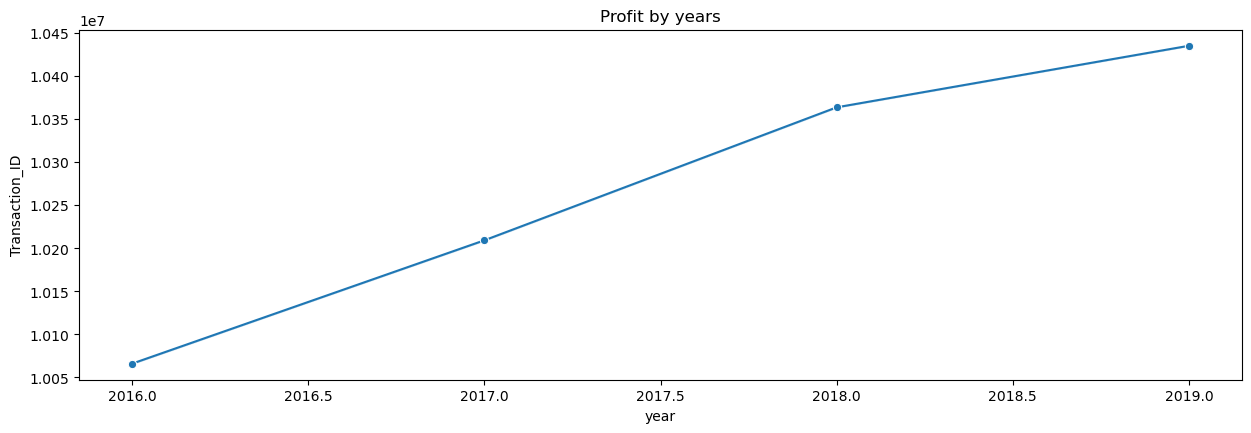

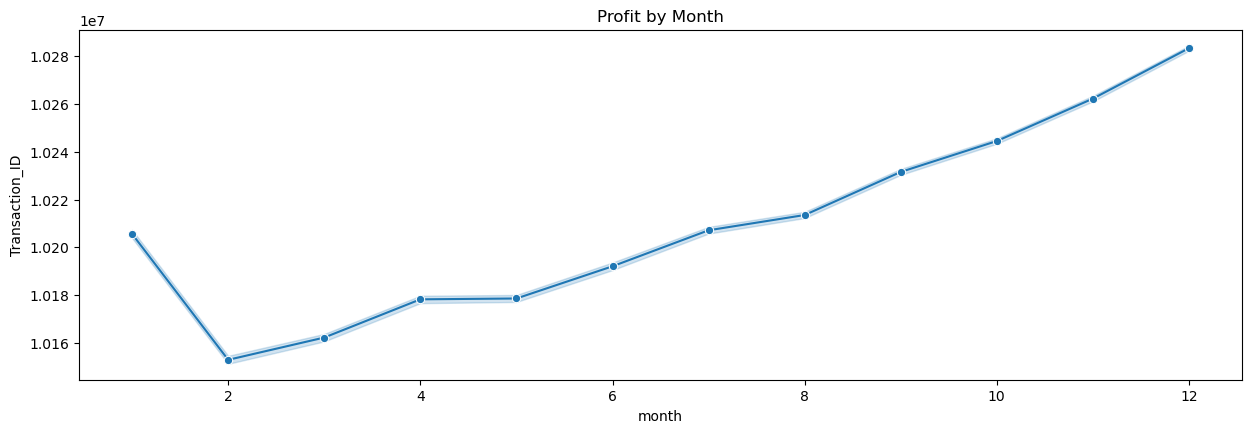

In [461]:
#Examination of the data set in monthly and annual periods
fig=plt.figure(figsize=(15,10))
# group = data.groupby(data['Company']=='Pink Cab')['Transaction_ID'].count().sort_values(ascending=False).reset_index()

fig.add_subplot(2,1,1) 
data["year"]=data["Date_of_Travel"].apply(lambda x: x.year)
ax=sns.lineplot(data=data, x='year',y='Transaction_ID', marker='o', palette='paired')
plt.title("Profit by years")




fig=plt.figure(figsize=(15,10))
# group = data.groupby(data['Company']=='Pink Cab')['Transaction_ID'].count().sort_values(ascending=False).reset_index()

fig.add_subplot(2,1,1) 
data["month"]=data["Date_of_Travel"].apply(lambda x: x.month)
ax=sns.lineplot(data=data, x='month',y='Transaction_ID', marker='o', palette='paired')
plt.title("Profit by Month")


Text(0.5, 1.0, 'Profit by Month')

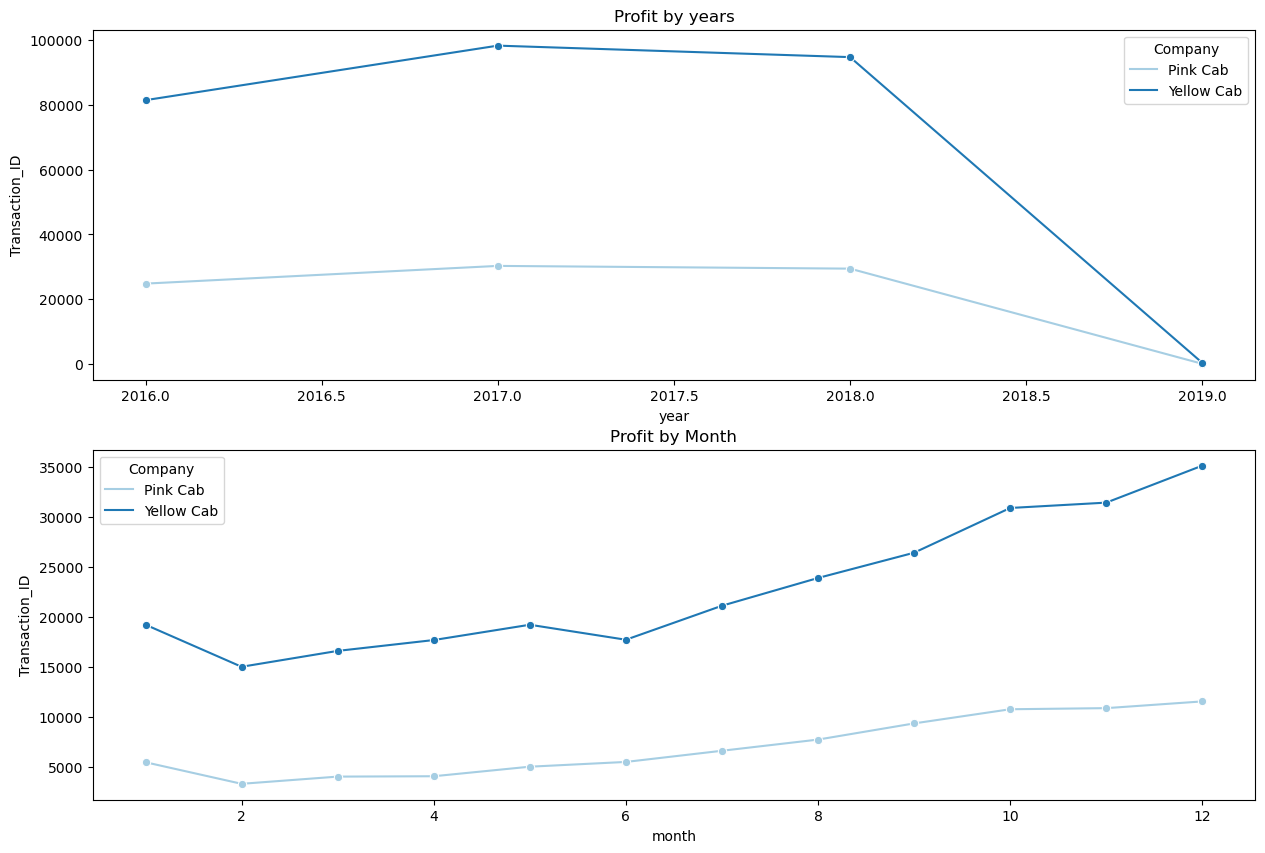

In [469]:
#Examination of the data set in monthly and annual periods
fig=plt.figure(figsize=(15,10)

fig.add_subplot(2,1,1) 
data["year"]=data["Date_of_Travel"].apply(lambda x: x.year)
data_yearly = data.groupby(['year', 'Company']).agg({'Transaction_ID': 'count'}).reset_index()


ax=sns.lineplot(data=data_yearly, x='year',y='Transaction_ID',hue="Company", marker='o', palette='Paired')
plt.title("Profit by years")



fig.add_subplot(2,1,2) 
data["month"]=data["Date_of_Travel"].apply(lambda x: x.month)
data_monthly = data.groupby(['month', 'Company']).agg({'Transaction_ID': 'count'}).reset_index()

ax=sns.lineplot(data=data_monthly, x='month',y='Transaction_ID', marker='o',hue="Company", palette='Paired')
plt.title("Profit by Month")


<Axes: xlabel='Month', ylabel='Customer_ID'>

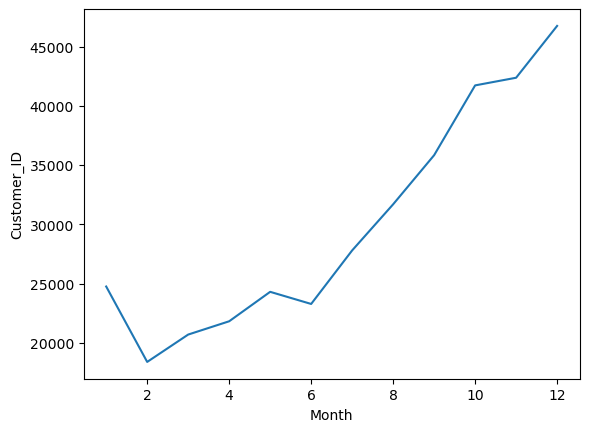

In [481]:
group= data.groupby('Month')['Customer_ID'].count().reset_index()
sns.lineplot(data=group,x='Month', y='Customer_ID')

<Axes: xlabel='day', ylabel='Customer_ID'>

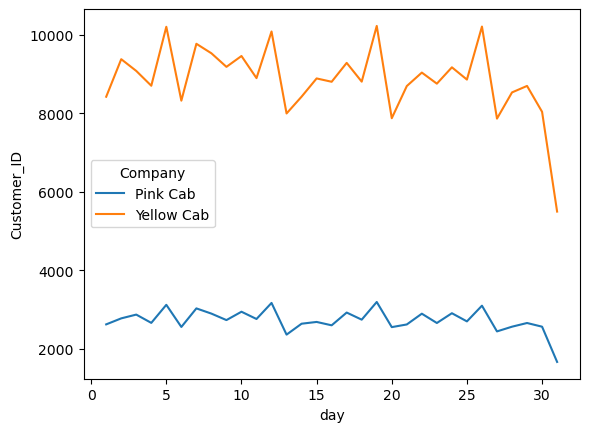

In [476]:
data["day"]=data["Date_of_Travel"].apply(lambda x: x.day)
group= data.groupby(['day','Company'])['Customer_ID'].count().reset_index()
sns.lineplot(data=group,x='day', y='Customer_ID', hue='Company')


In [472]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   index           359392 non-null  int64         
 1   Transaction_ID  359392 non-null  int64         
 2   Date_of_Travel  359392 non-null  datetime64[ns]
 3   Company         359392 non-null  object        
 4   City            359392 non-null  object        
 5   KM_Travelled    359392 non-null  float64       
 6   Price_Charged   359392 non-null  float64       
 7   Cost_of_Trip    359392 non-null  float64       
 8   Day             359392 non-null  int64         
 9   Month           359392 non-null  int64         
 10  Year            359392 non-null  int64         
 11  Profit          359392 non-null  float64       
 12  Customer_ID     359392 non-null  int64         
 13  Payment_Mode    359392 non-null  object        
 14  Population      359392 non-null  obj

In [494]:
gender_cab = data.groupby(['Company', 'Gender'])['Customer_ID'].nunique().reset_index()
gender_cab

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer_ID, dtype: int64

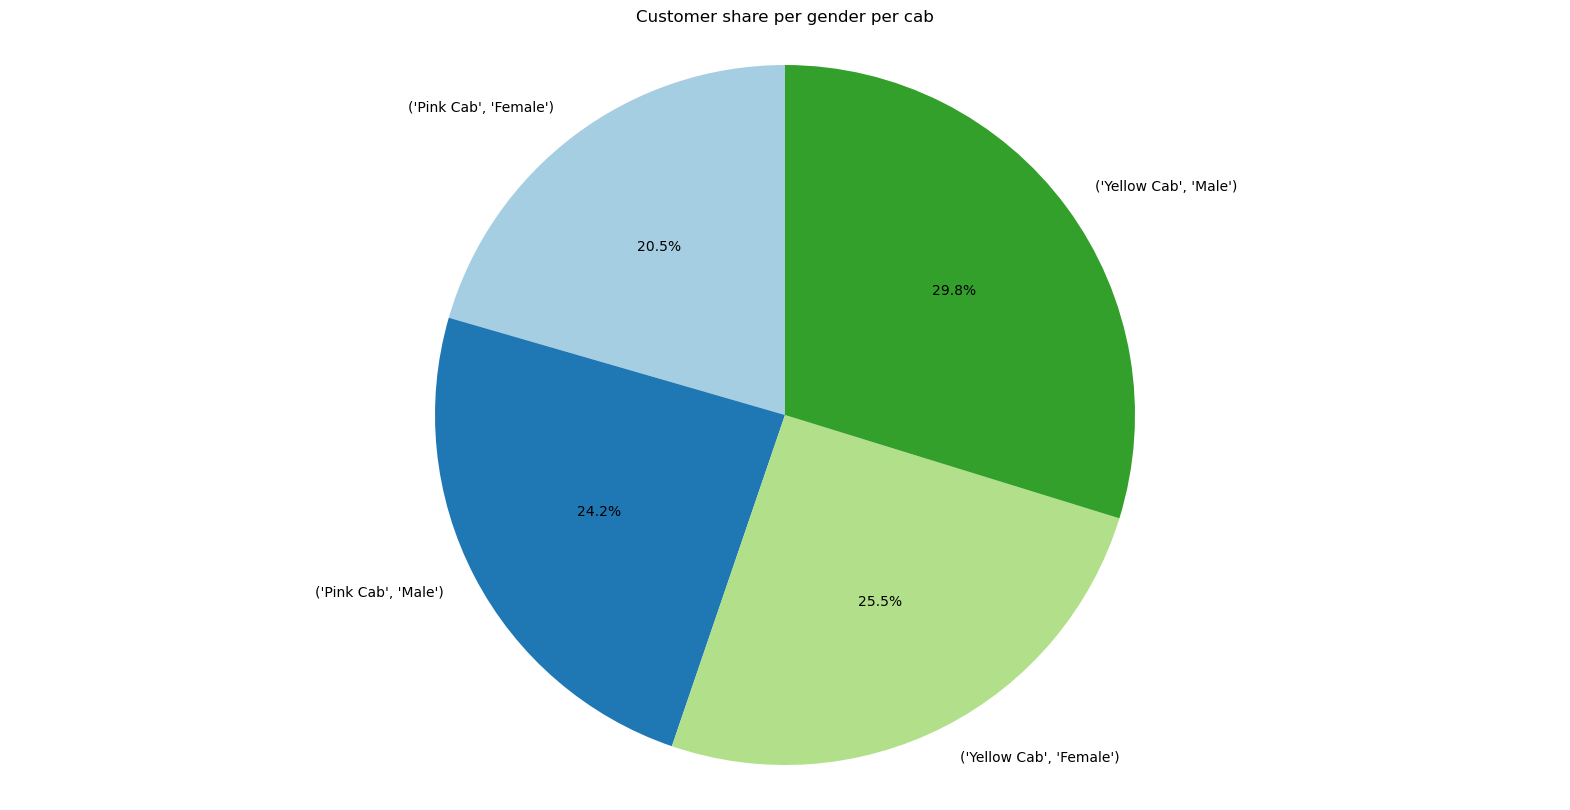

In [496]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=False, startangle=90, colors=sns.color_palette("Paired"))
axp.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()

In [517]:
profit=data.groupby(['Company','Y=year'])['Profit'].sum().reset_index()
km_travelled=data.groupby(['Company','Y=year'])['KM_Travelled'].sum().reset_index()
data1=profit["Profit"]/km_travelled["KM_Travelled"]
data1=pd.DataFrame(data1)
data1.rename(columns={data1.columns[0]: 'Profit'}, inplace=True)
data1.loc[:,"year"]=profit["Y=year"]
data1.loc[:,"Company"]=profit["Company"]
group=data1.groupby(['Company','year'])['Profit'].sum().reset_index()
group


Company  year    Profit
0    Pink Cab  2016  3.024160
1    Pink Cab  2017  2.965563
2    Pink Cab  2018  2.374093
3    Pink Cab  2019  3.200222
4  Yellow Cab  2016  7.489302
5  Yellow Cab  2017  7.484665
6  Yellow Cab  2018  6.379079
7  Yellow Cab  2019  4.150689

In [518]:
data1

Profit  year     Company
0  3.024160  2016    Pink Cab
1  2.965563  2017    Pink Cab
2  2.374093  2018    Pink Cab
3  3.200222  2019    Pink Cab
4  7.489302  2016  Yellow Cab
5  7.484665  2017  Yellow Cab
6  6.379079  2018  Yellow Cab
7  4.150689  2019  Yellow Cab

/var/folders/_n/q8m30_td1vz_7986hph1s4wh0000gp/T/ipykernel_25790/3755878957.py:16: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




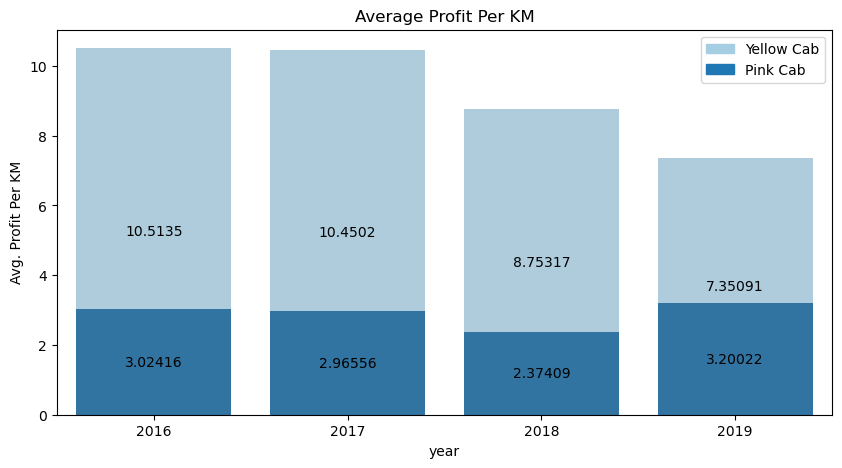

In [523]:
import matplotlib.patches as mpatches

plt.figure(figsize=(10,5))

group=data1.groupby(['year'])['Profit'].sum().reset_index()


colors = sns.color_palette("Paired")
light_blue = colors[0]  # First color in Paired palette
dark_blue = colors[1]   # Second color in Paired palette

bar1=sns.barplot(data=group, x="year", y="Profit", color=light_blue)

company=data1[data1.Company=="Pink Cab"]

bar2=sns.barplot(data=company, x="year", y="Profit", color=dark_blue, ci=None, estimator=sum)


#add legend
top_bar = mpatches.Patch(color=light_blue, label='Yellow Cab')
bottom_bar = mpatches.Patch(color=dark_blue, label='Pink Cab')
plt.legend(handles=[top_bar, bottom_bar])

#add label
bar1.bar_label(bar1.containers[0],label_type='center')
bar2.bar_label(bar2.containers[1],label_type='center')

plt.ylabel("Avg. Profit Per KM")
plt.title("Average Profit Per KM")

# show the graph
plt.show()

In [528]:
data.head()

index  Transaction_ID Date_of_Travel     Company        City  KM_Travelled  \
0      0        10000011     2016-01-10    Pink Cab  ATLANTA GA         30.45   
1      1        10351127     2018-07-23  Yellow Cab  ATLANTA GA         26.19   
2      2        10412921     2018-11-25  Yellow Cab  ATLANTA GA         42.55   
3      3        10000012     2016-01-08    Pink Cab  ATLANTA GA         28.62   
4      4        10320494     2018-04-23  Yellow Cab  ATLANTA GA         36.38   

   Price_Charged  Cost_of_Trip  Day  Month  ...  Population     Users  Gender  \
0         370.95      313.6350   10      1  ...    814,885    24,701     Male   
1         598.70      317.4228   23      7  ...    814,885    24,701     Male   
2         792.05      597.4020   25     11  ...    814,885    24,701     Male   
3         358.52      334.8540    8      1  ...    814,885    24,701     Male   
4         721.10      467.1192   23      4  ...    814,885    24,701     Male   

  Age Income State  year  Y=year  month day  
0  28  10813    GA  2016    2016      1  10  
1  28  10813    GA  2018    2018      7  23  
2  28  10813    GA  2018    2018     11  25  
3  27   9237    GA  2016    2016      1   8  
4  27   9237    GA  2018    2018      4  23  

[5 rows x 24 columns]

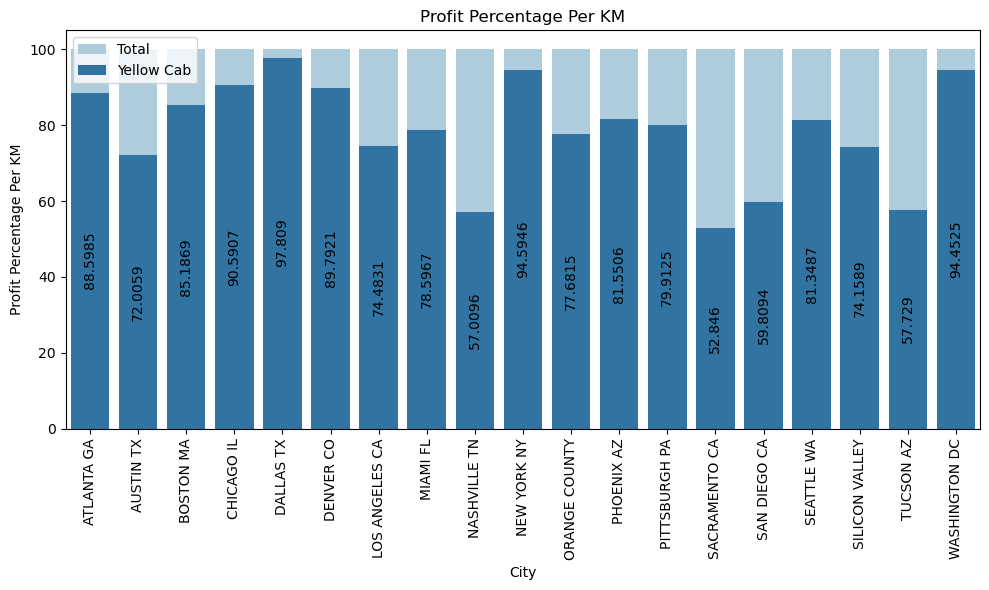

In [542]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(10, 6))

# Group data and calculate profit percentage
total = data.groupby('City')['Profit'].sum().reset_index()
company = data[data.Company == 'Yellow Cab'].groupby('City')['Profit'].sum().reset_index()

# Calculate profit percentage
company['Profit'] = [i / j * 100 for i, j in zip(company['Profit'], total['Profit'])]
total['Profit'] = [i / j * 100 for i, j in zip(total['Profit'], total['Profit'])]

# Define colors from Paired palette
colors = sns.color_palette("Paired")
light_blue = colors[0]  # First color in Paired palette
dark_blue = colors[1]   # Second color in Paired palette

# Plot bar chart
bar1 = sns.barplot(data=total, x='City', y='Profit', color=light_blue, label='Total')
bar2 = sns.barplot(data=company, x='City', y='Profit', color=dark_blue, label='Yellow Cab')

# Add legend
plt.legend()

# Add bar labels
# for p in bar1.patches:
#     bar1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
#                   ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# for p in bar2.patches:
#     bar2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
#                   ha='center', va='center', xytext=(0, 9), textcoords='offset points', color='black')

bar2.bar_label(bar2.containers[1],label_type='center',rotation=90, color='black')

plt.ylabel("Profit Percentage Per KM")
plt.title("Profit Percentage Per KM")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()


/var/folders/_n/q8m30_td1vz_7986hph1s4wh0000gp/T/ipykernel_25790/3063985936.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



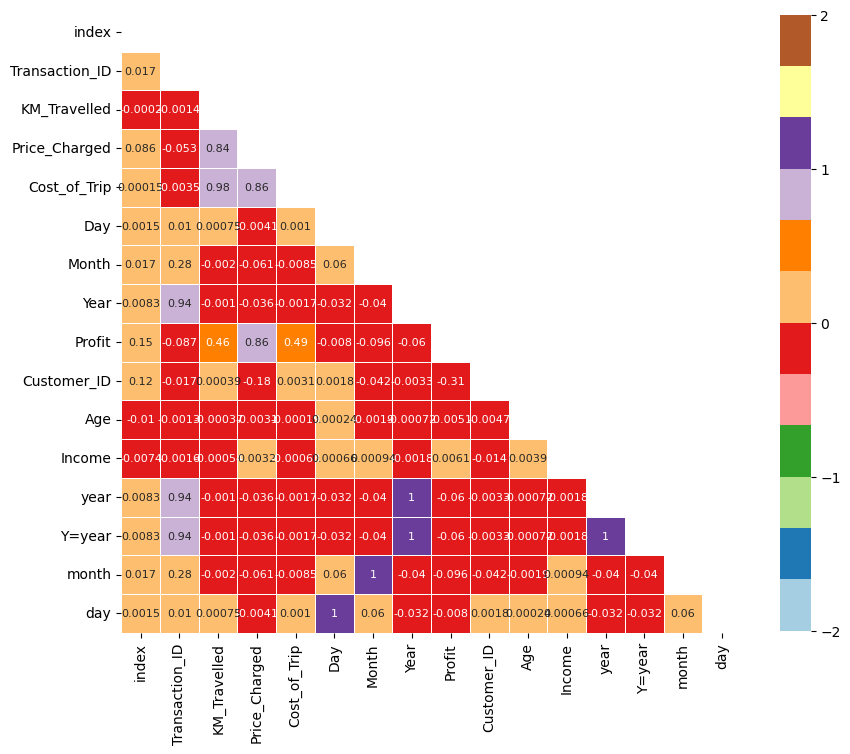

In [548]:
# Plotting heatmap 
corr=data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
f, ax = plt.subplots(figsize=(10, 10)) 
heatmap = sns.heatmap(corr,mask=mask,
                      square = True,
                      linewidths = .5,
                      cmap = "Paired",
                      cbar_kws = {'shrink': .8, 
                                "ticks" : [-2, -1, 0, 1, 2]},
                      vmin = -2, 
                      vmax = 2,
                      annot = True,
                      annot_kws = {"size":8})
# Add the column names as labels
ax.set_yticklabels(corr.columns)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True});
     

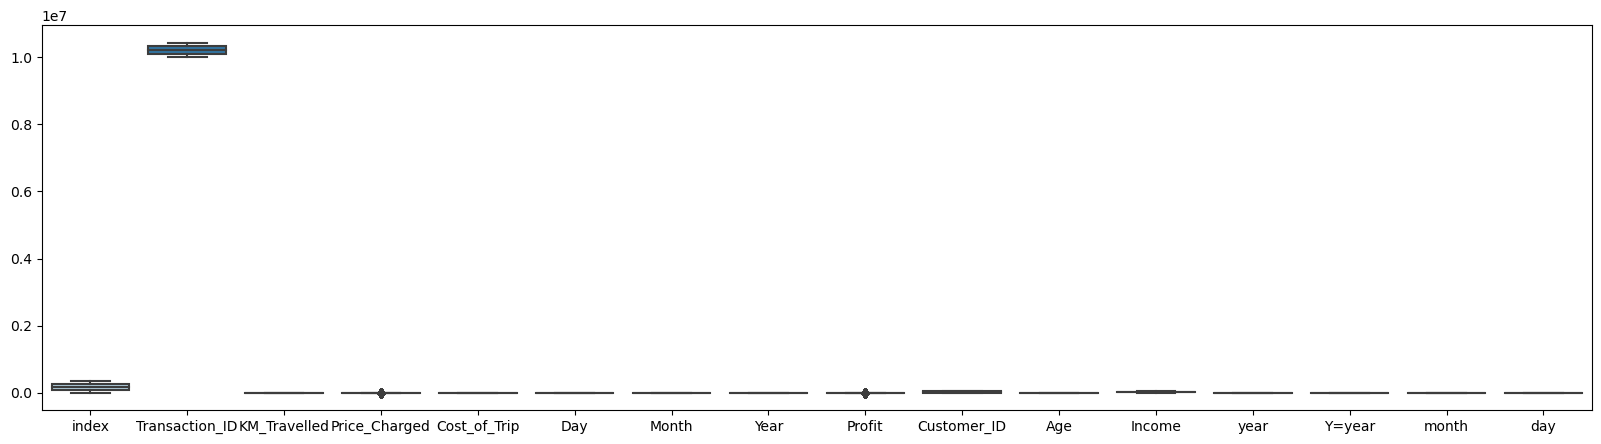

In [549]:
plt.figure(figsize=(20,5))
sns.boxplot(data=data, palette='Paired')
plt.show()

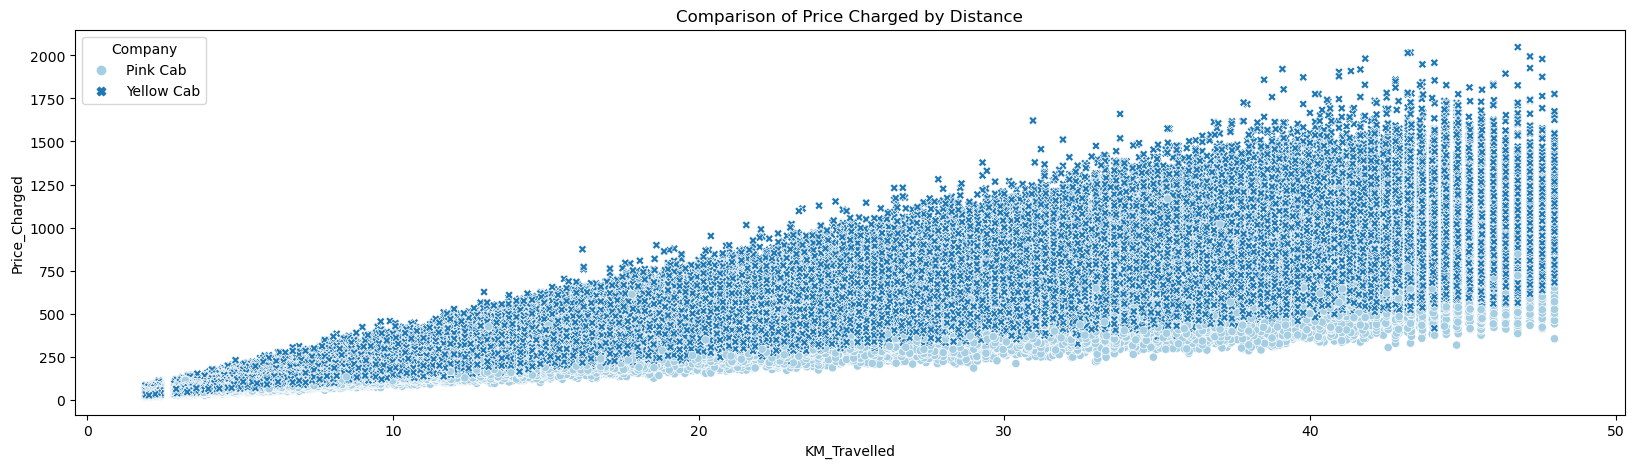

In [573]:
plt.figure(figsize=(20,5))

sns.scatterplot(data=data, x='KM_Travelled', y='Price_Charged', 
                hue='Company',
                style='Company',
                palette='Paired')
plt.title('Comparison of Price Charged by Distance')

plt.show()


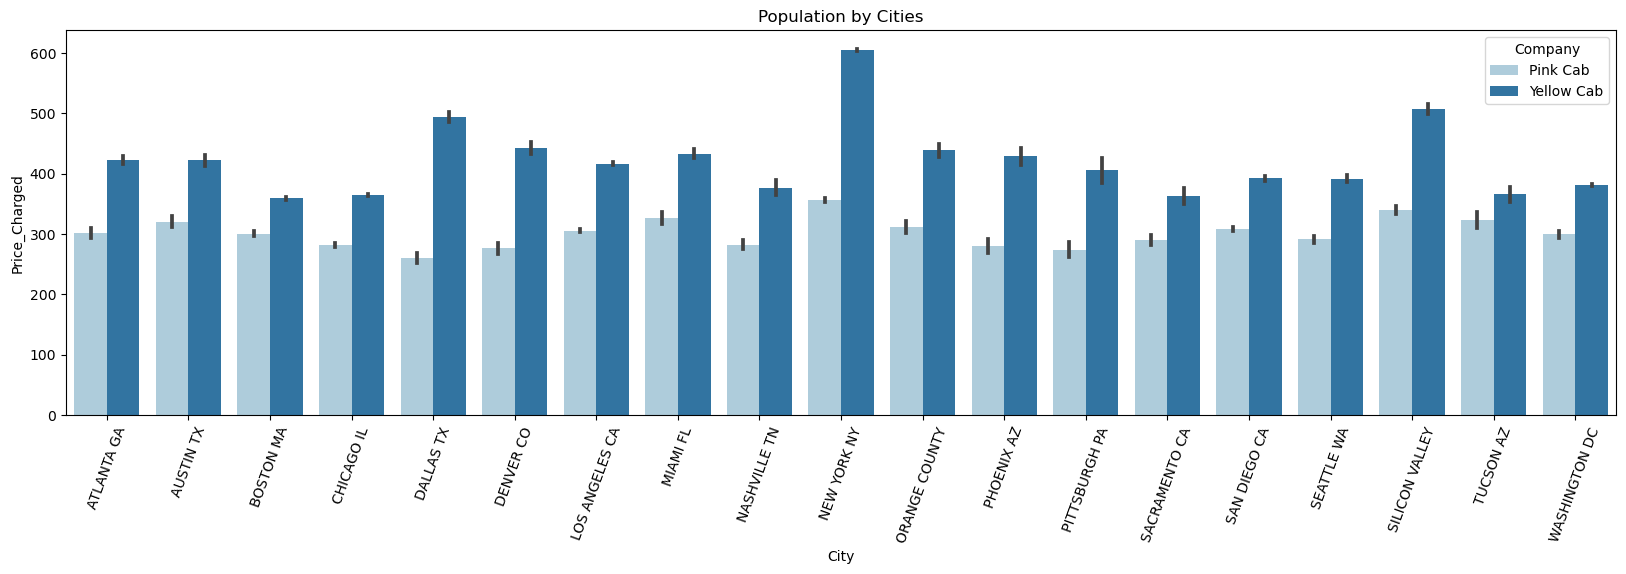

In [574]:
plt.figure(figsize=(20,5))

sns.barplot(data=data, y="Price_Charged", x="City", hue="Company", palette='Paired')
plt.xticks(rotation=70)
plt.title("Population by Cities")

plt.show()

<Figure size 1000x500 with 0 Axes>

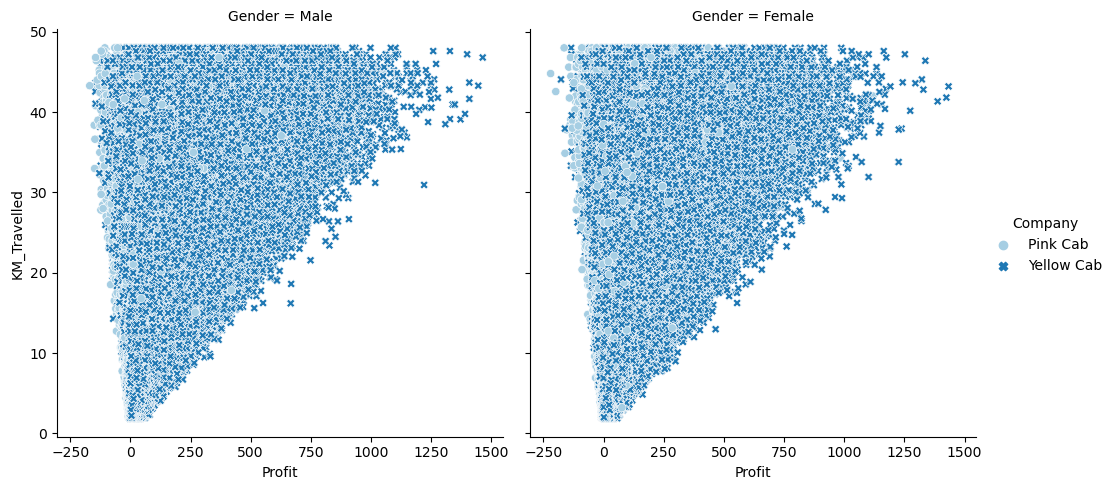

In [577]:
plt.figure(figsize = (10, 5))
sns.relplot(
    data=data, x="Profit", y="KM_Travelled",
    col="Gender", hue="Company", style="Company",
    palette='Paired',
    kind="scatter"
)

Hypothesis Tests


In [578]:
from scipy.stats import ttest_ind

# Hypothesis 1:

H0:Gender has not effect on company profit
H1:Gender has effect on company profit

In [582]:
dict={
    "Profit":"mean"
}

group1= data.groupby((data.Company== 'Pink Cab')& (data.Gender=='Male')).agg(dict)
group2= data.groupby((data.Company== 'Pink Cab')& (data.Gender=='Female')).agg(dict)

t_stat,p_value=ttest_ind(group1, group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)


if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")


dict={
    "Profit":"mean"
}

group1= data.groupby((data.Company== 'Yellow Cab')& (data.Gender=='Male')).agg(dict)
group2= data.groupby((data.Company== 'Yellow Cab')& (data.Gender=='Female')).agg(dict)

t_stat,p_value=ttest_ind(group1, group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)


if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")
    
    

t_statistics: [0.02786795] 
p_value: [0.98029821]
Reject Alternative Hypothesis(H1)
t_statistics: [-0.08386648] 
p_value: [0.94080144]
Reject Alternative Hypothesis(H1)


In [583]:
data.Payment_Mode


0         Card
1         Cash
2         Card
3         Card
4         Card
          ... 
359387    Cash
359388    Cash
359389    Card
359390    Cash
359391    Card
Name: Payment_Mode, Length: 359392, dtype: object

# Hypothesis 2:

H0:Payment mode has not effect on company profit
H1:Payment mode has effect on company profit

In [585]:
dict={
    "Profit":"mean"
}

group1= data.groupby((data.Company== 'Pink Cab')& (data.Payment_Mode=='Cash')).agg(dict)
group2= data.groupby((data.Company== 'Pink Cab')& (data.Payment_Mode=='Card')).agg(dict)

t_stat,p_value=ttest_ind(group1, group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)


if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")


dict={
    "Profit":"mean"
}

group1= data.groupby((data.Company== 'Yellow Cab')& (data.Payment_Mode=='Cash')).agg(dict)
group2= data.groupby((data.Company== 'Yellow Cab')& (data.Payment_Mode=='Card')).agg(dict)

t_stat,p_value=ttest_ind(group1, group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)


if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

t_statistics: [-0.03834307] 
p_value: [0.97289731]
Reject Alternative Hypothesis(H1)
t_statistics: [0.17875066] 
p_value: [0.8746019]
Reject Alternative Hypothesis(H1)


# Hypothesis 3:

H0:Age has not effect on company profit
H1:Age has effect on company profit

In [587]:
dict={
    "Profit":"mean"
}

group1= data.groupby((data.Company== 'Pink Cab')& (data.Age<=50)).agg(dict)
group2= data.groupby((data.Company== 'Pink Cab')& (data.Age>50)).agg(dict)

t_stat,p_value=ttest_ind(group1, group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)


if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")


dict={
    "Profit":"mean"
}

group1= data.groupby((data.Company== 'Yellow Cab')& (data.Age<=50)).agg(dict)
group2= data.groupby((data.Company== 'Yellow Cab')& (data.Age>50)).agg(dict)

t_stat,p_value=ttest_ind(group1, group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)


if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

t_statistics: [0.13340069] 
p_value: [0.90608835]
Reject Alternative Hypothesis(H1)
t_statistics: [-0.50355161] 
p_value: [0.66456451]
Reject Alternative Hypothesis(H1)


# Hypothesis 4:

H0:The variable Year has not a positive correlation with mileage
H1:The variable Year has a positive correlation with mileage

In [590]:
agg_dict = {
    'KM_Travelled': 'mean'
      }
group1 = data.groupby((data.Year==2018)&(data.Company=='Pink Cab')).agg(agg_dict)
group2 = data.groupby((data.Year==2017)&(data.Company=='Pink Cab')).agg(agg_dict)

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

group1 = data.groupby((data.Year==2018)&(data.Company=='Yellow Cab')).agg(agg_dict)
group2 = data.groupby((data.Year==2017)&(data.Company=='Yellow Cab')).agg(agg_dict)

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")
     

t_statistics: [-0.66243408] 
p_value: [0.57581736]
Reject Alternative Hypothesis(H1)
t_statistics: [-0.42772975] 
p_value: [0.71050085]
Reject Alternative Hypothesis(H1)


In [591]:
data.head()

index  Transaction_ID Date_of_Travel     Company        City  KM_Travelled  \
0      0        10000011     2016-01-10    Pink Cab  ATLANTA GA         30.45   
1      1        10351127     2018-07-23  Yellow Cab  ATLANTA GA         26.19   
2      2        10412921     2018-11-25  Yellow Cab  ATLANTA GA         42.55   
3      3        10000012     2016-01-08    Pink Cab  ATLANTA GA         28.62   
4      4        10320494     2018-04-23  Yellow Cab  ATLANTA GA         36.38   

   Price_Charged  Cost_of_Trip  Day  Month  ...  Population  Users  Gender  \
0         370.95      313.6350   10      1  ...         NaN    NaN    Male   
1         598.70      317.4228   23      7  ...         NaN    NaN    Male   
2         792.05      597.4020   25     11  ...         NaN    NaN    Male   
3         358.52      334.8540    8      1  ...         NaN    NaN    Male   
4         721.10      467.1192   23      4  ...         NaN    NaN    Male   

  Age  Income  State  year  Y=year  month day  
0  28   10813     GA  2016    2016      1  10  
1  28   10813     GA  2018    2018      7  23  
2  28   10813     GA  2018    2018     11  25  
3  27    9237     GA  2016    2016      1   8  
4  27    9237     GA  2018    2018      4  23  

[5 rows x 24 columns]

In [595]:
data.Income.mean()

15048.822937071498

# # Hypothesis 5:

H0:The variable Income has not a positive correlation with mileage
H1:The variable Income has a positive correlation with mileage

In [596]:
agg_dict = {
    'KM_Travelled': 'mean'
      }
group1 = data.groupby((data.Income<=15048.822937071498)&(data.Company=='Pink Cab')).agg(agg_dict)
group2 = data.groupby((data.Income>15048.822937071498)&(data.Company=='Pink Cab')).agg(agg_dict)

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

group1 = data.groupby((data.Income<=15048.822937071498)&(data.Company=='Yellow Cab')).agg(agg_dict)
group2 = data.groupby((data.Income>15048.822937071498)&(data.Company=='Yellow Cab')).agg(agg_dict)

t_stat,p_value=ttest_ind(group1 , group2, equal_var=True)

print('t_statistics:', t_stat, '\np_value:', p_value)

if p_value<0.05:
  print("Reject Null Hypothesis (H0)")
elif p_value>=0.05:
  print("Reject Alternative Hypothesis(H1)")

t_statistics: [-0.75691848] 
p_value: [0.52811574]
Reject Alternative Hypothesis(H1)
t_statistics: [0.19035288] 
p_value: [0.86660314]
Reject Alternative Hypothesis(H1)


In [597]:
data.to_csv('/Users/jhasija9/Documents/Data Glacier Internship/Week-2/DataSets/master_data.csv',index = False)